# Análisis del Precio de Toyota Corolla

Este notebook analiza los factores que influyen en el precio de vehículos Toyota Corolla.

## 1. Configuración Inicial

### 1.1 Importación de Librerías

In [64]:
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
import joblib
from sklearn.linear_model import LassoCV, Lasso


mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("toyota_parcial")

## 2. Carga de Datos

In [51]:
# Cargar dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/dodobeatle/dataeng-datos/refs/heads/main/ToyotaCorolla.csv",
    encoding="utf8",
    engine="python"
)

## 3. Exploración Inicial de Datos

### 3.1 Dimensiones del Dataset

df.shape

### 3.2 Información General del Dataset

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

### 3.3 Estadísticas Descriptivas

In [53]:
df.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

### 3.4 Estructura de Columnas

In [54]:
print(df.columns.tolist())

['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']


### 3.5 Verificación de Valores Faltantes

In [55]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

### 3.6 Búsqueda de Duplicados

In [56]:
def find_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Identifica filas duplicadas completas en el DataFrame.

    Parámetros
    ----------
    df : pd.DataFrame
        El DataFrame en el que buscar duplicados.

    Devuelve
    -------
    pd.DataFrame
        Un DataFrame con todas las filas duplicadas (sin incluir la primera aparición).
    """
    # mask de duplicados (True en segundas y sucesivas apariciones)
    mask = df.duplicated(keep='first')
    # DataFrame con las filas duplicadas
    duplicates = df[mask].copy()
    return duplicates


duplicates = find_duplicates(df)
print(f"Número de filas duplicadas: {len(duplicates)}")
print("Filas duplicadas:")
print(duplicates)

Número de filas duplicadas: 0
Filas duplicadas:
Empty DataFrame
Columns: [Id, Model, Price, Age_08_04, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Automatic, cc, Doors, Cylinders, Gears, Quarterly_Tax, Weight, Mfr_Guarantee, BOVAG_Guarantee, Guarantee_Period, ABS, Airbag_1, Airbag_2, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Tow_Bar]
Index: []

[0 rows x 37 columns]


## 4. Análisis Exploratorio de Datos (EDA)

### 4.1 Análisis Univariado

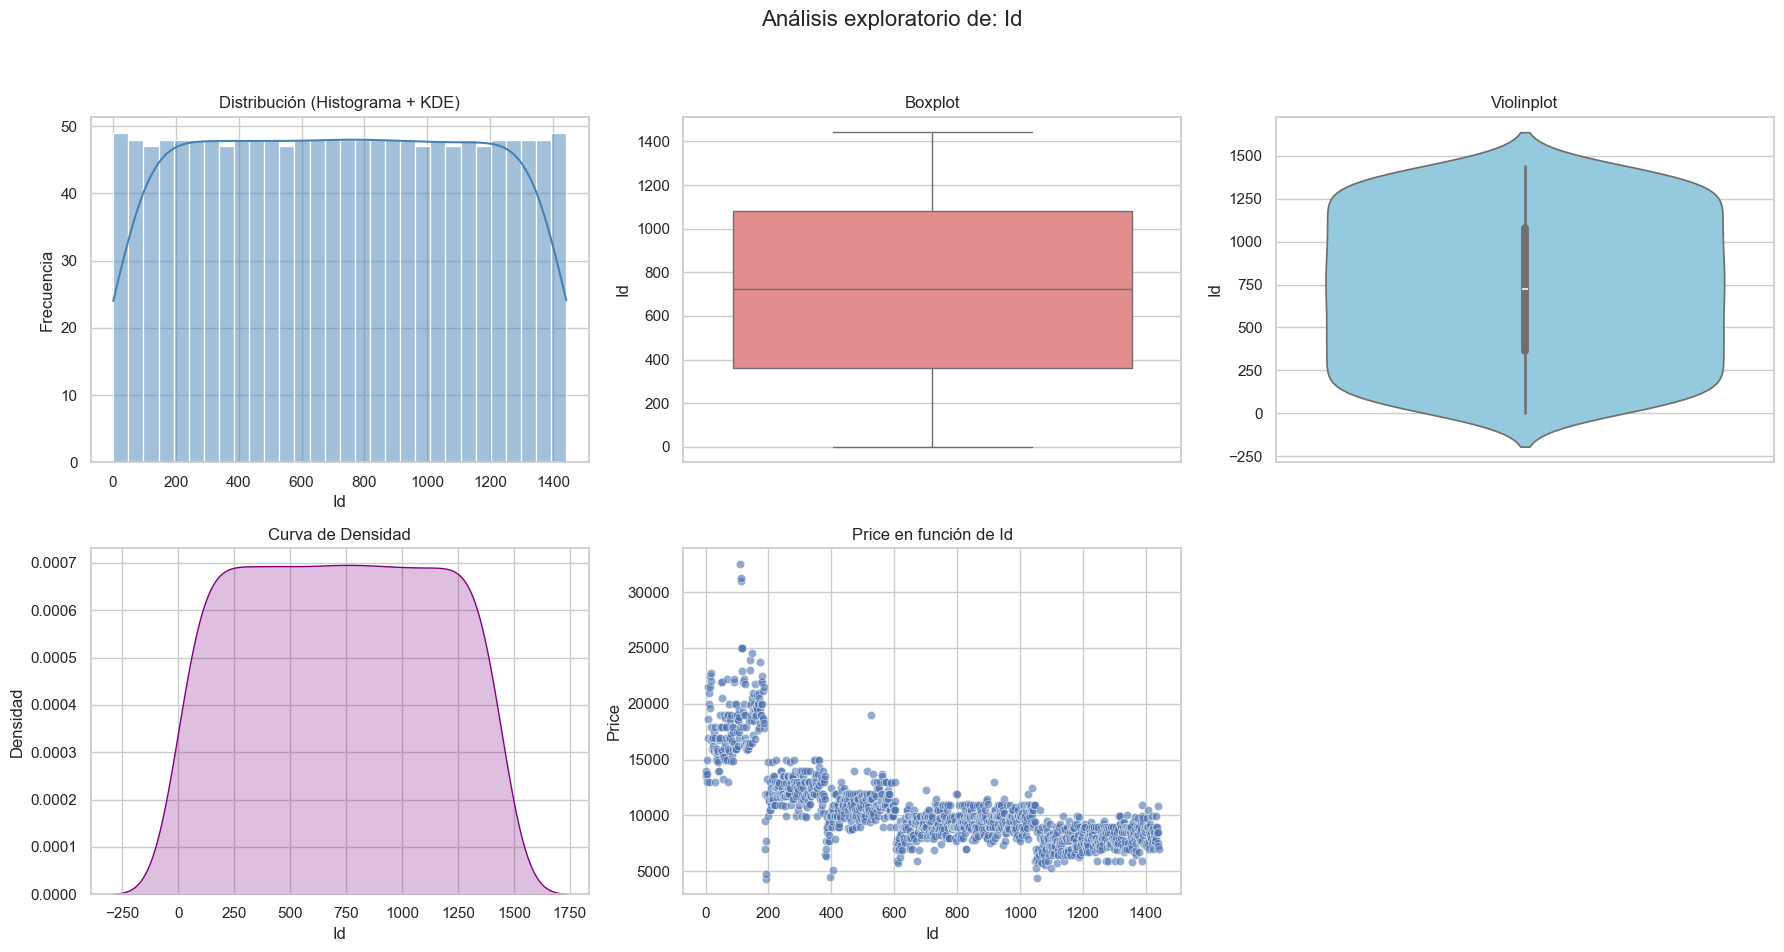

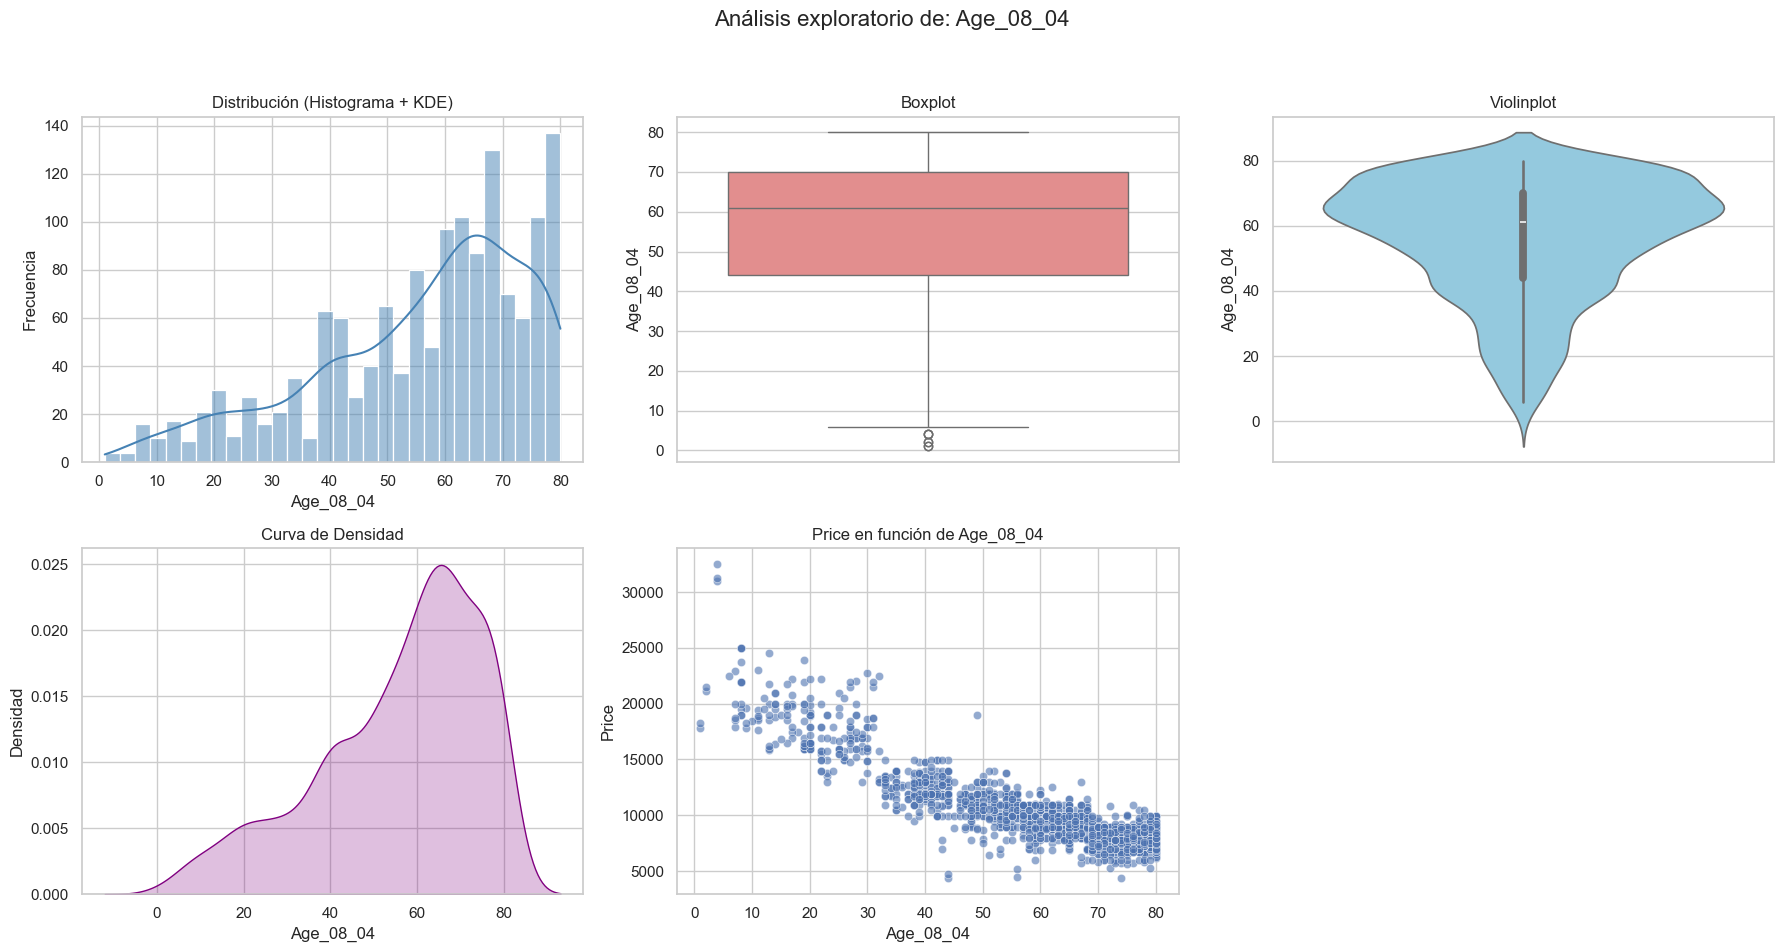

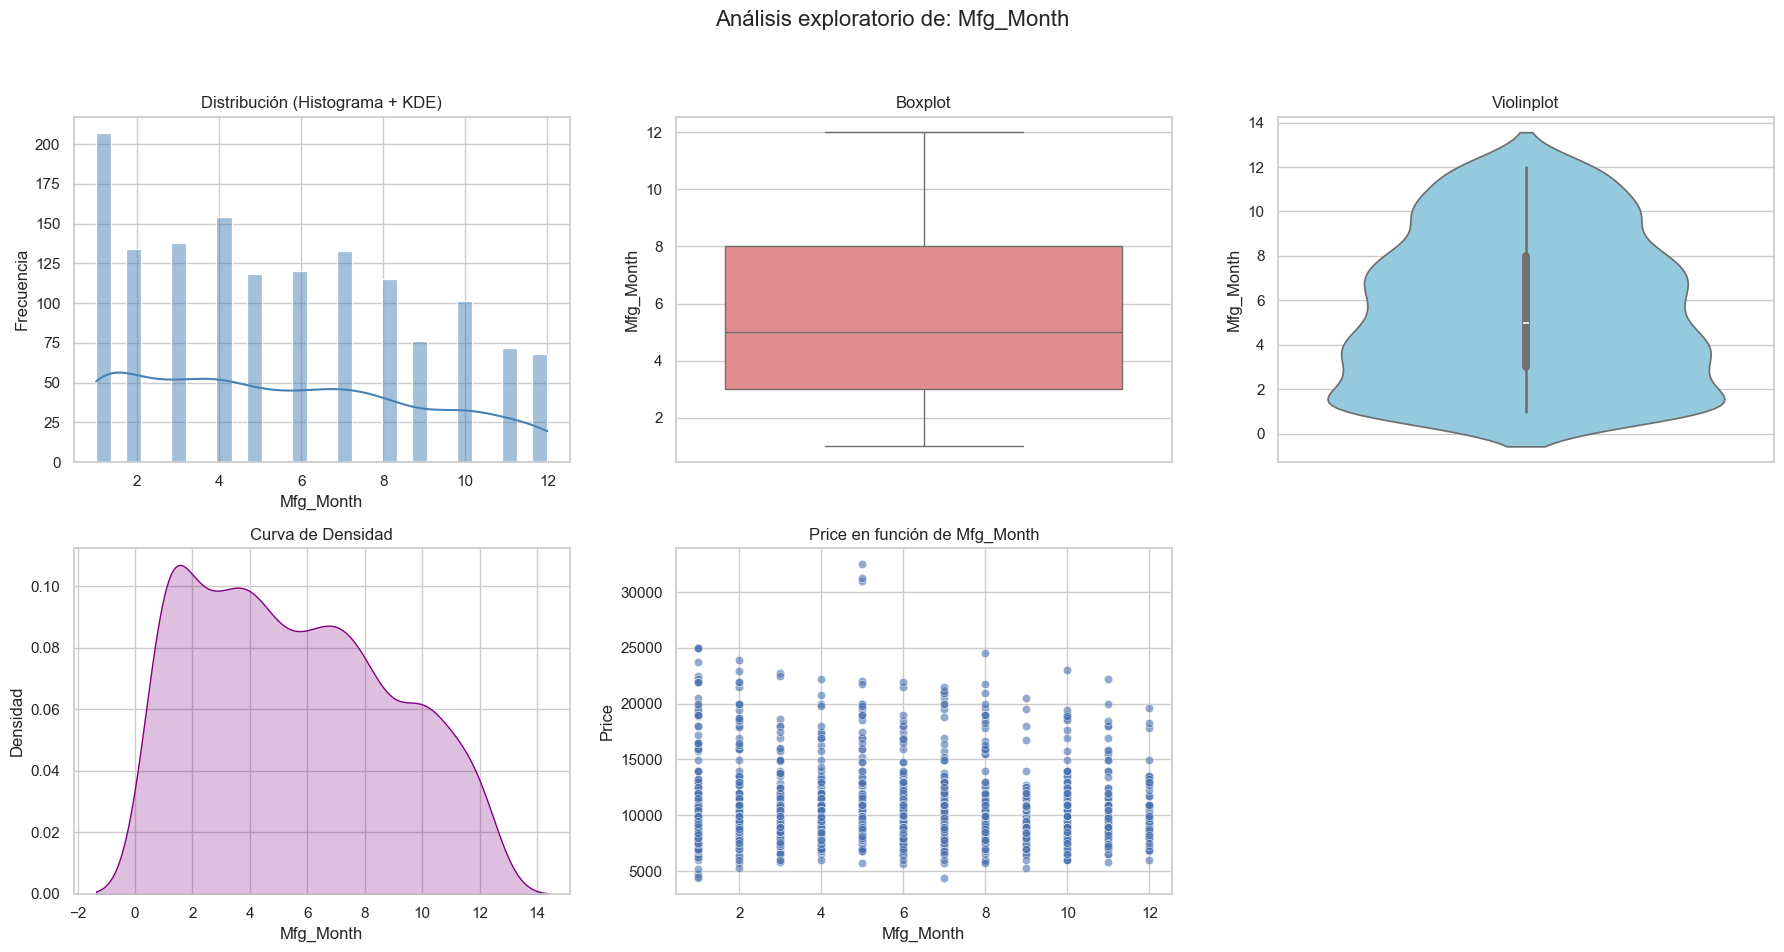

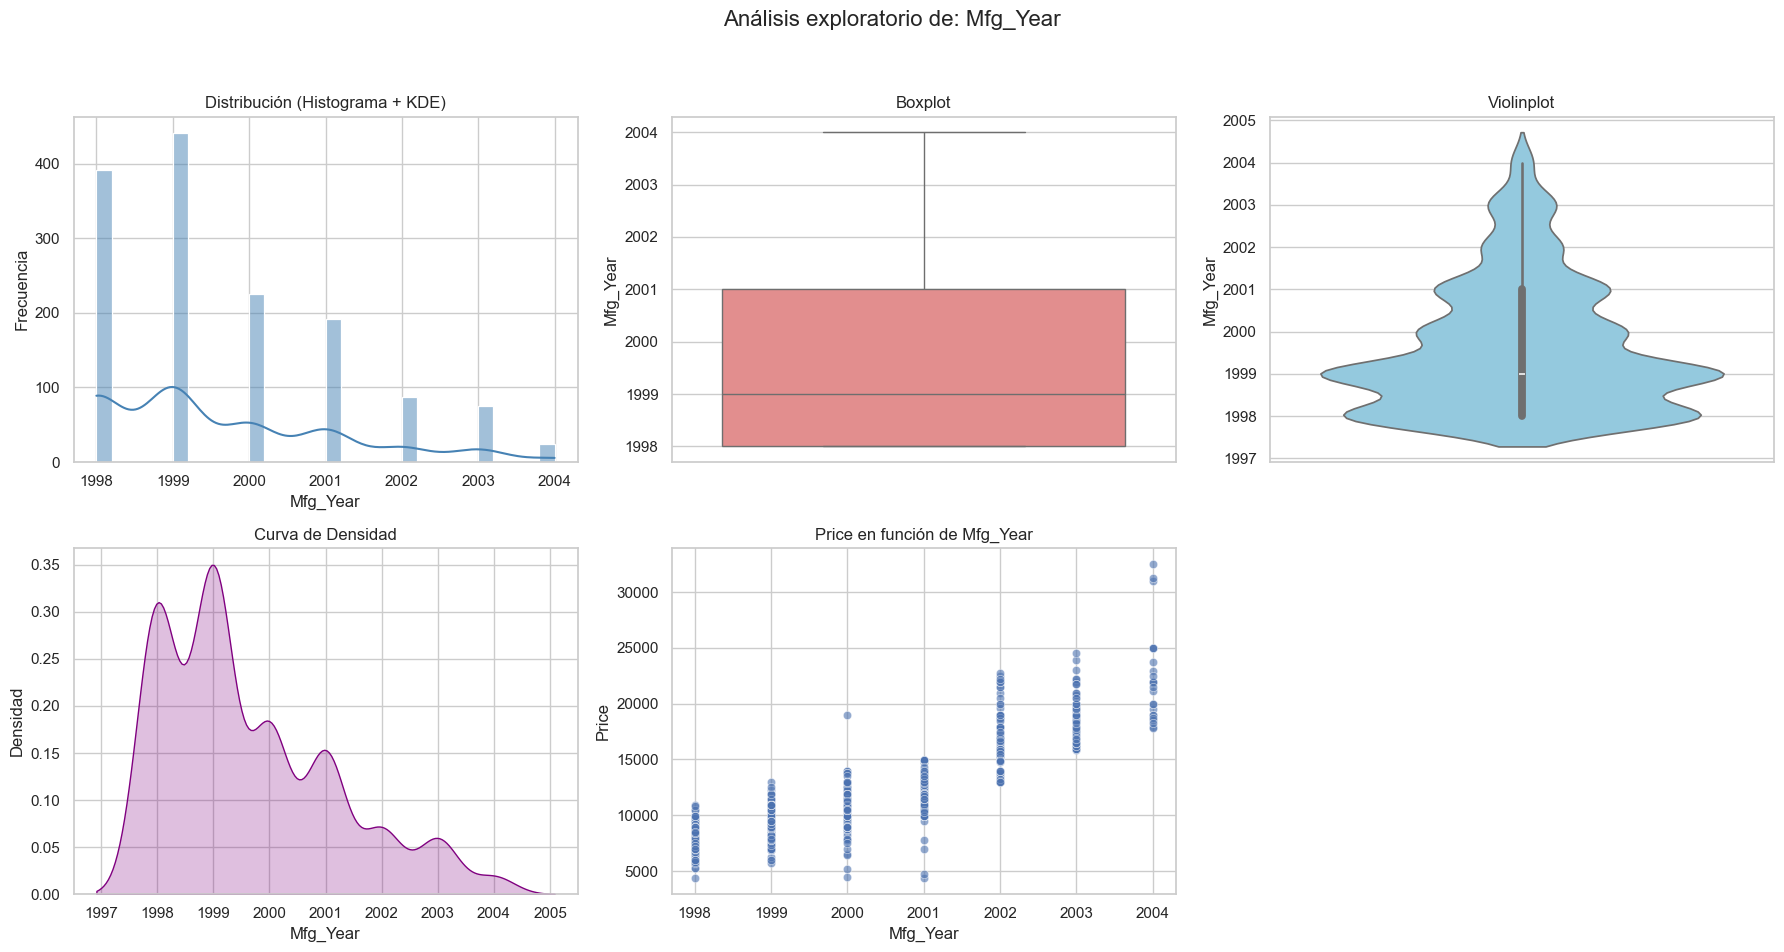

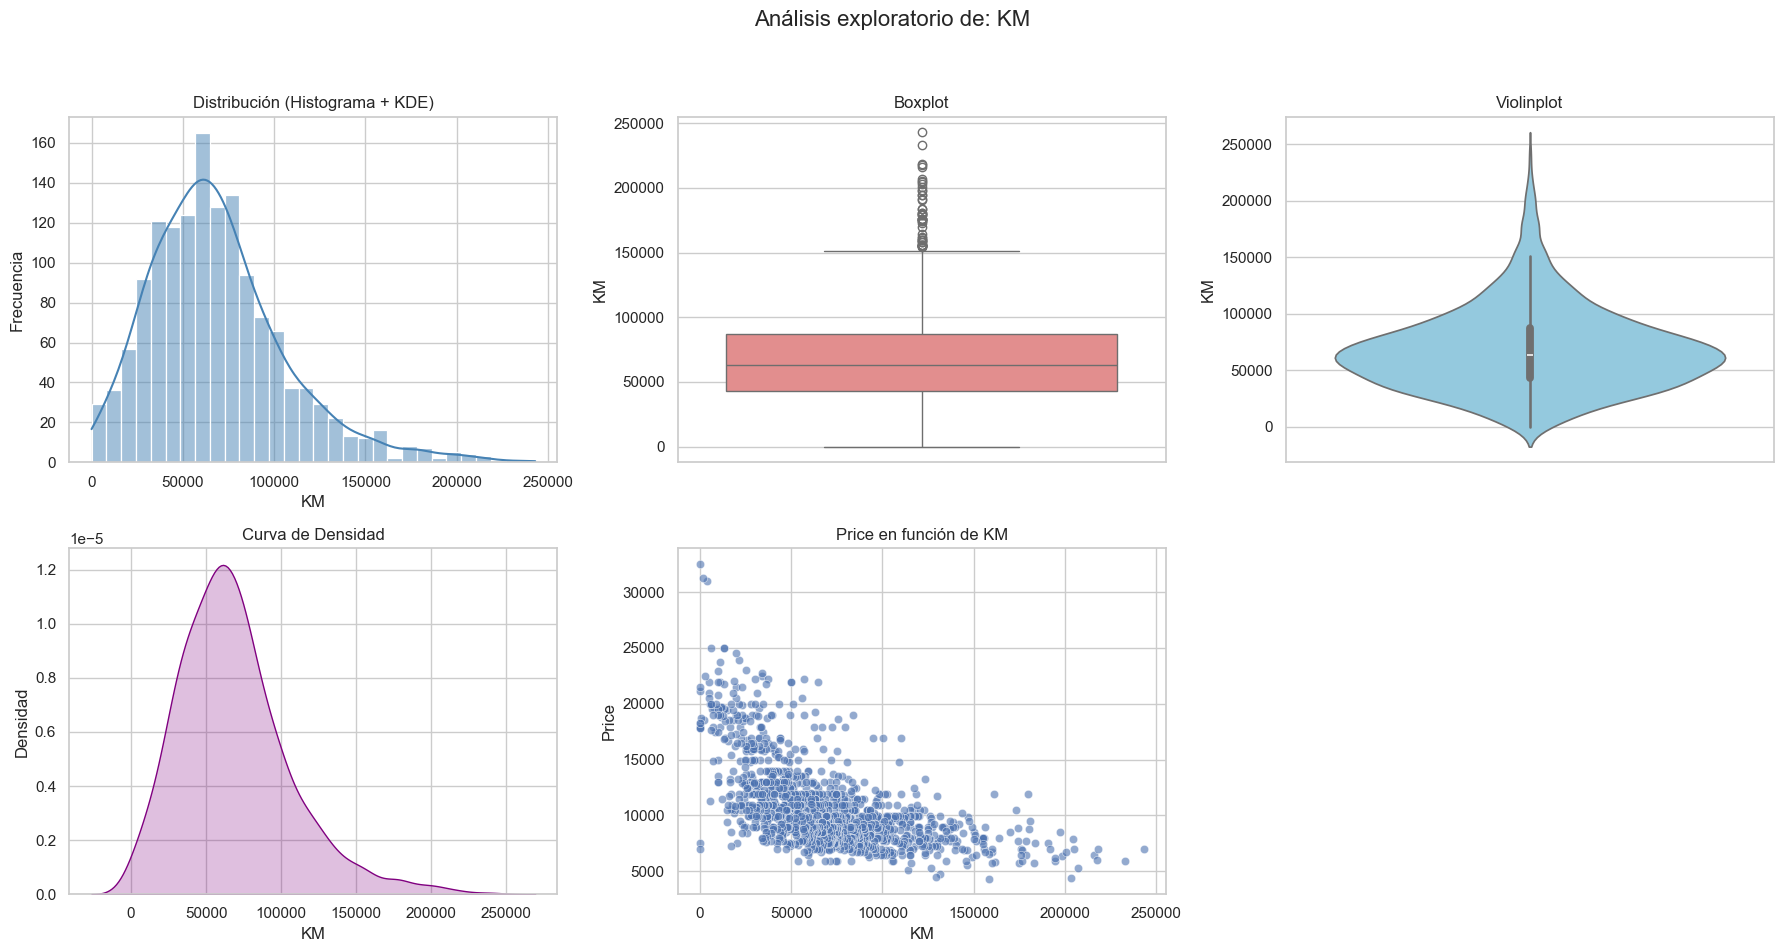

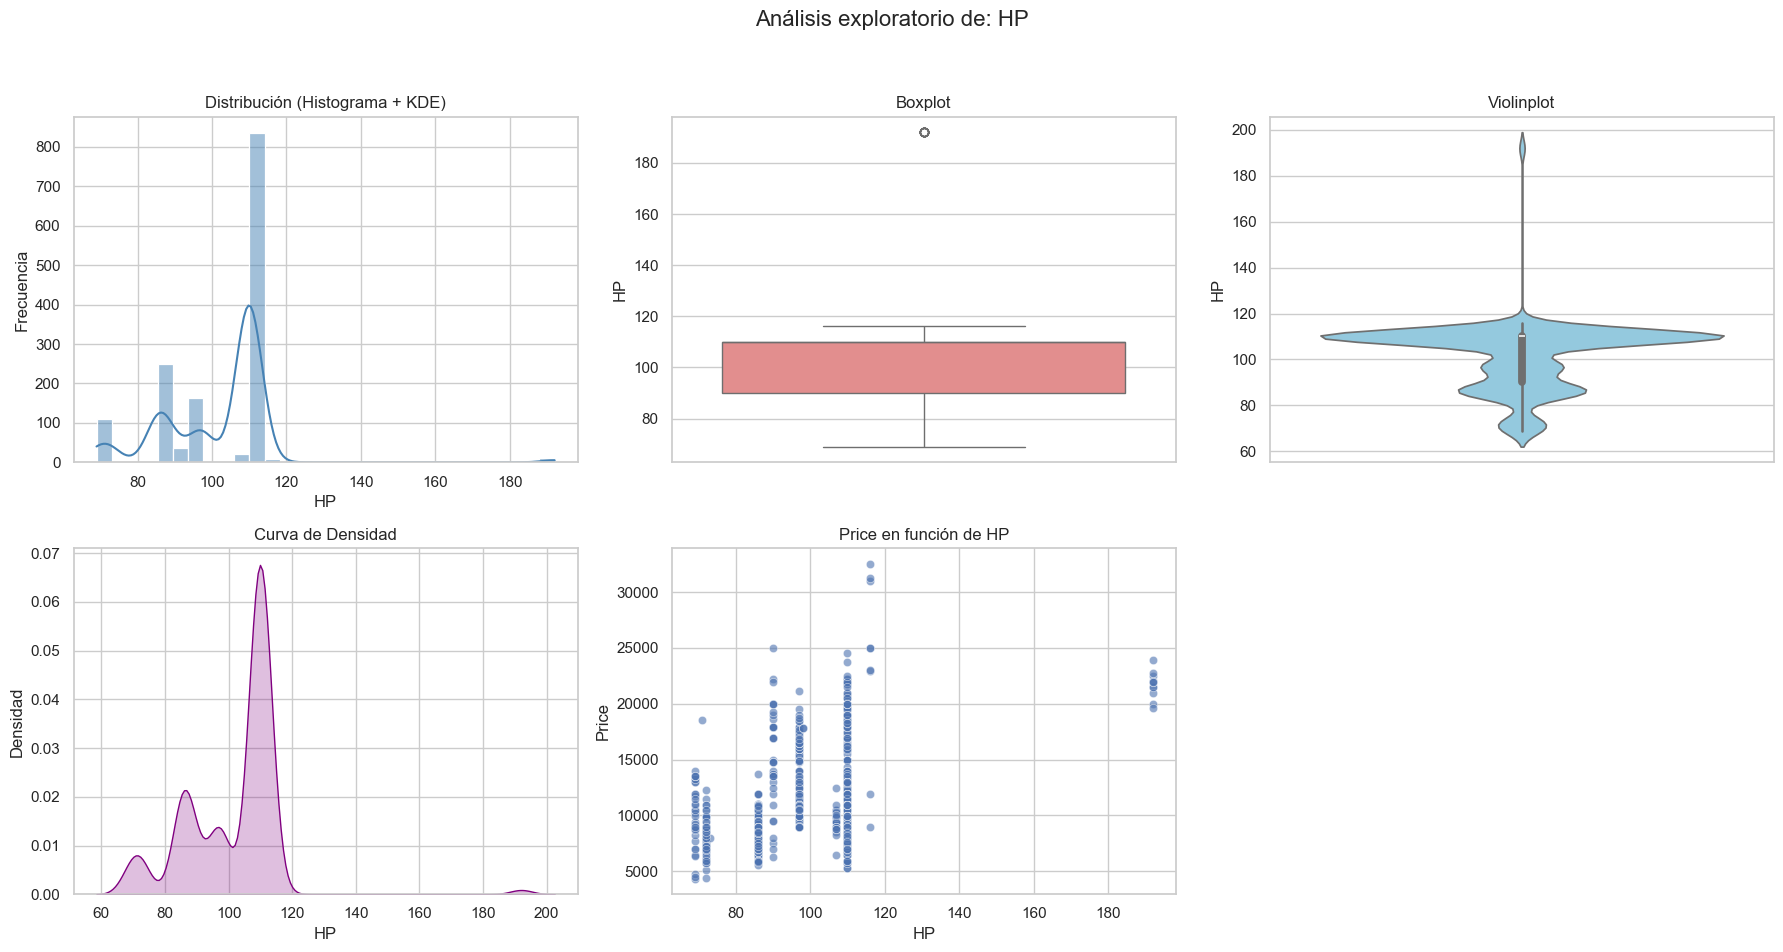

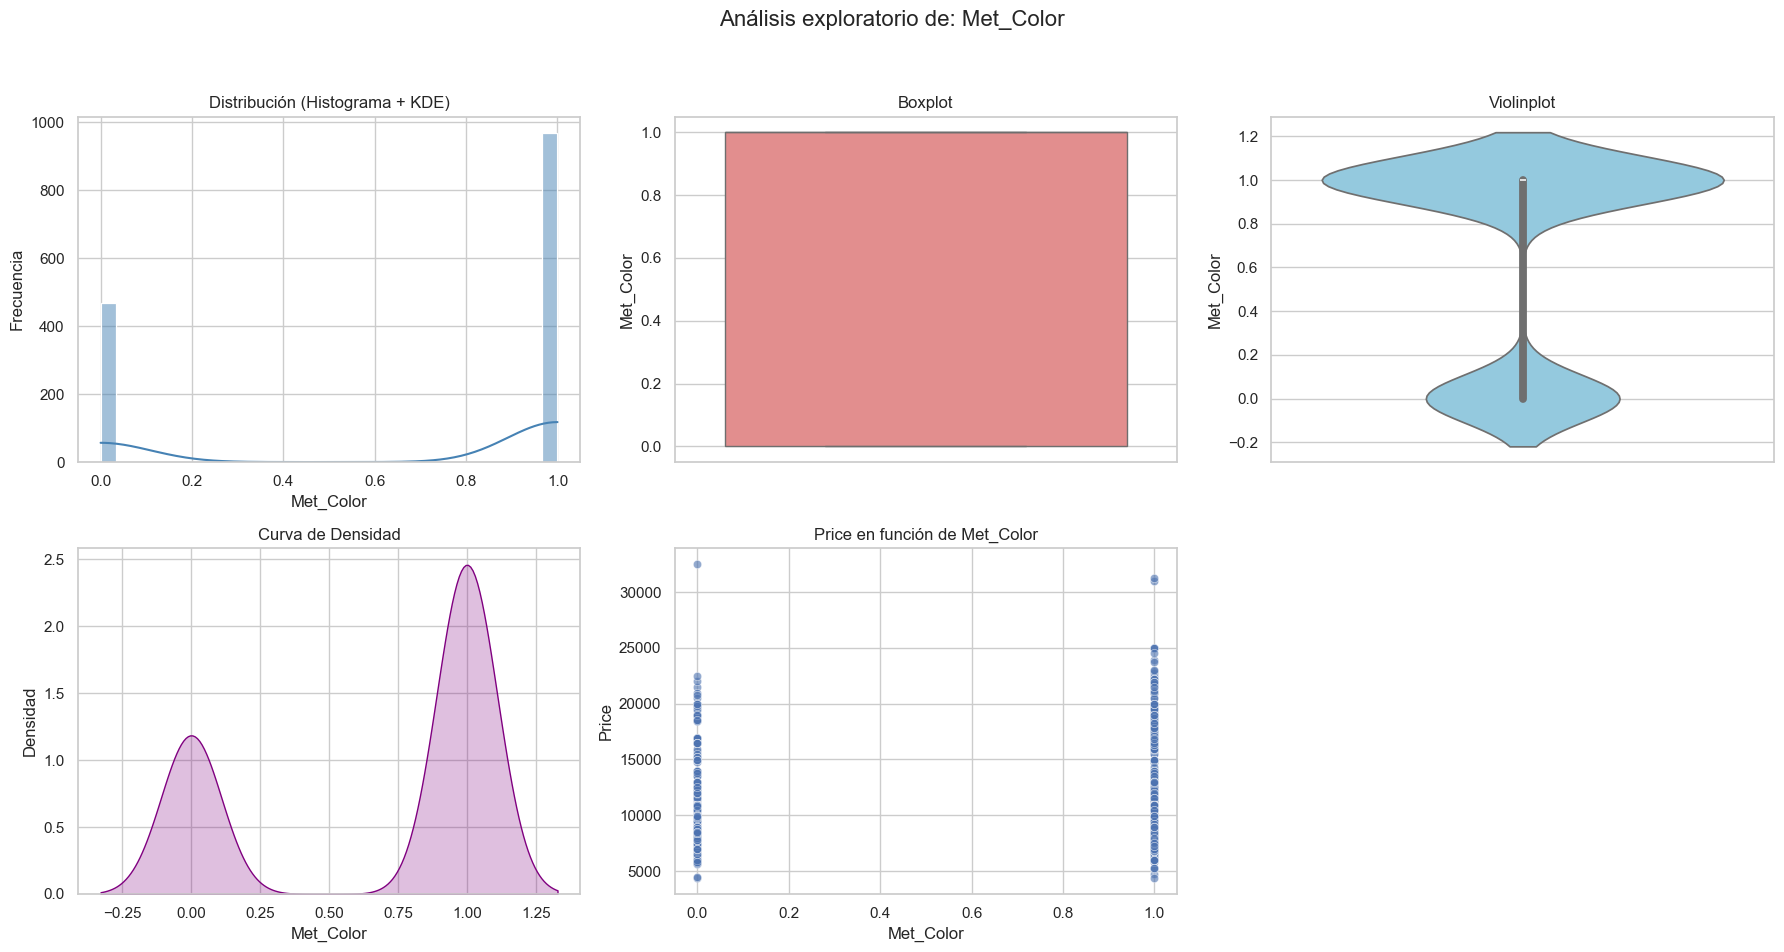

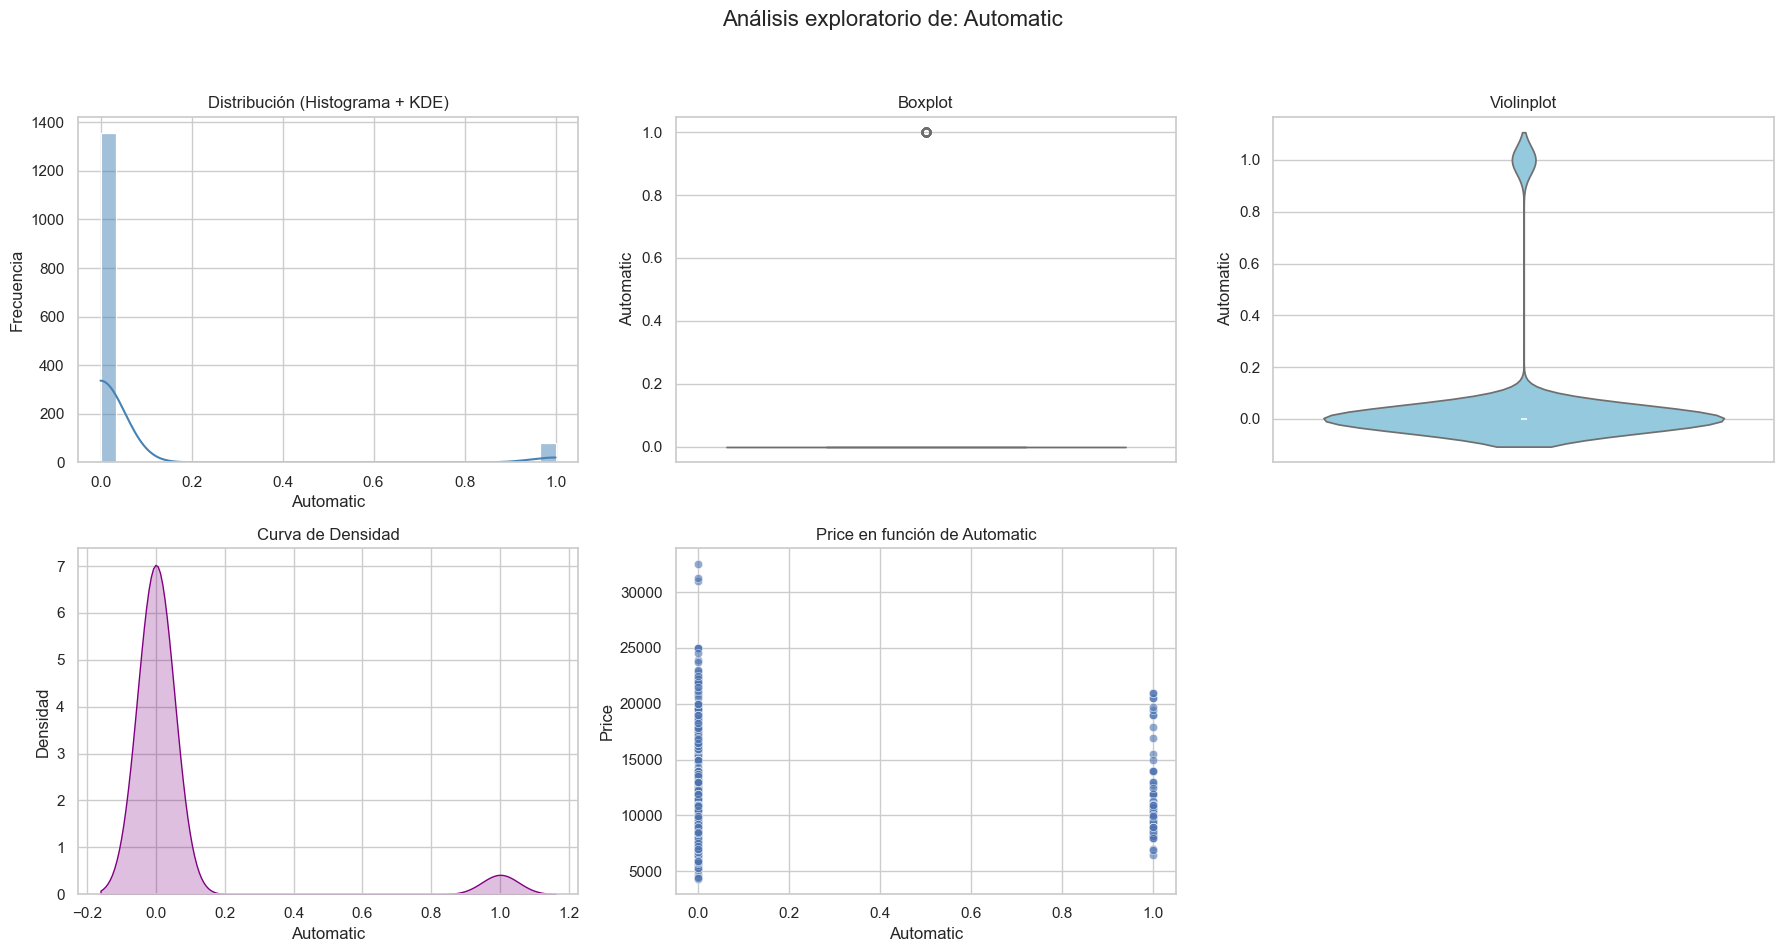

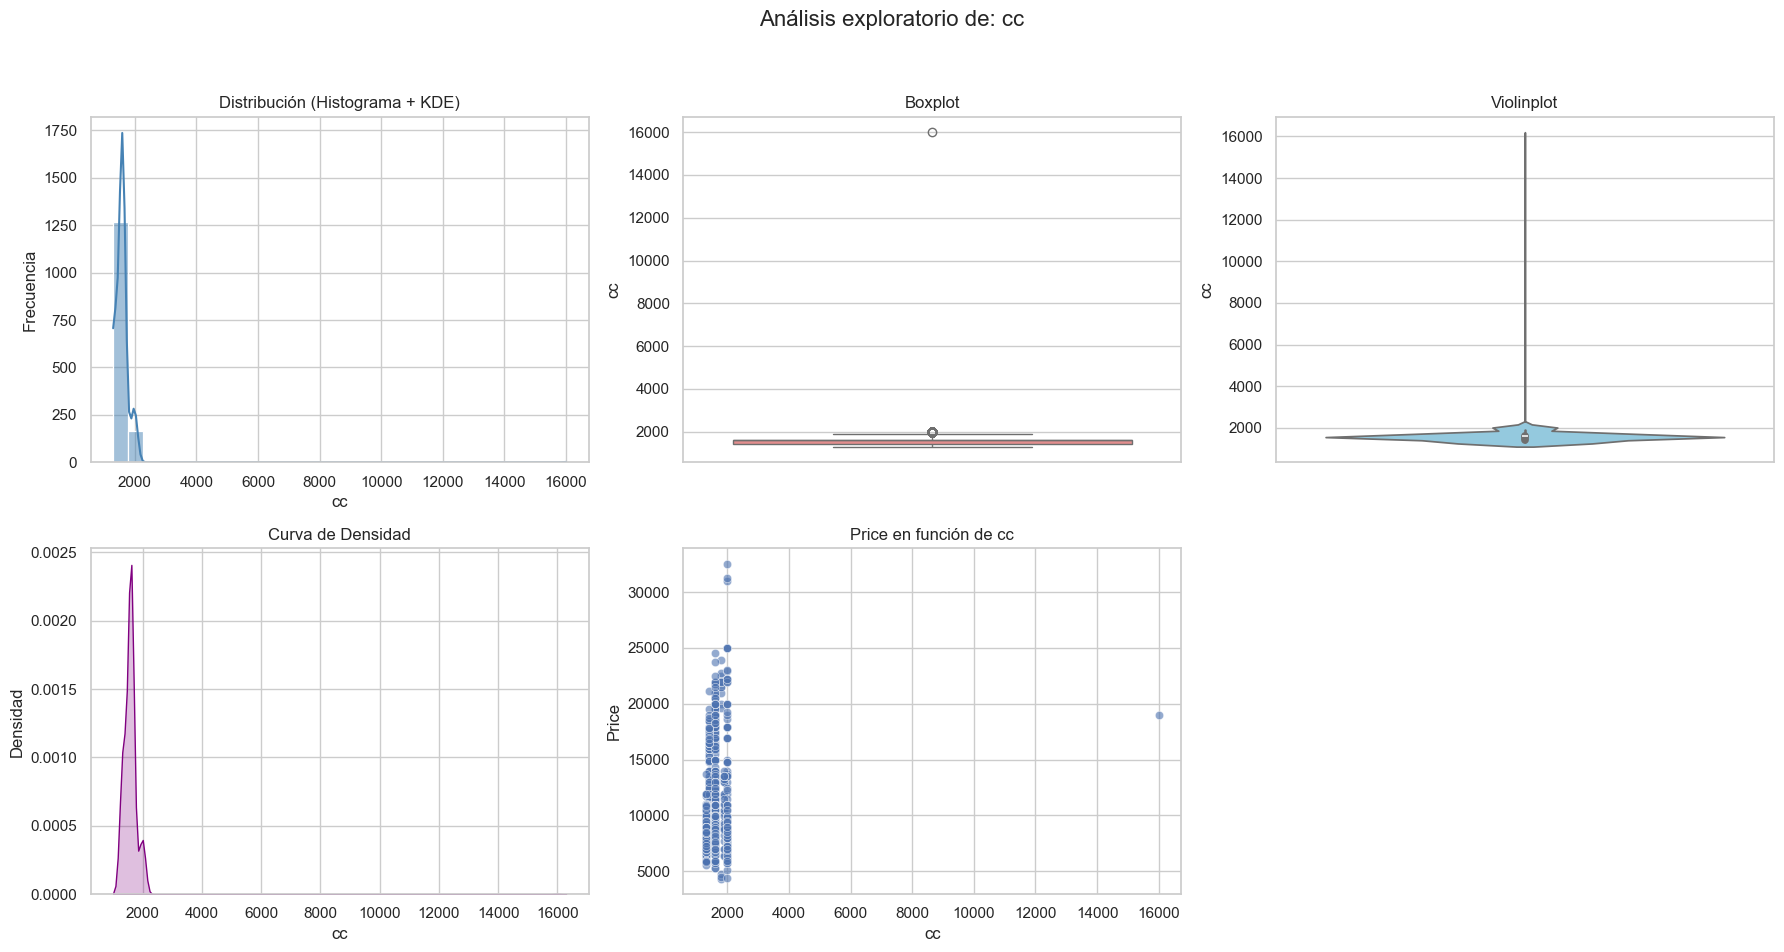

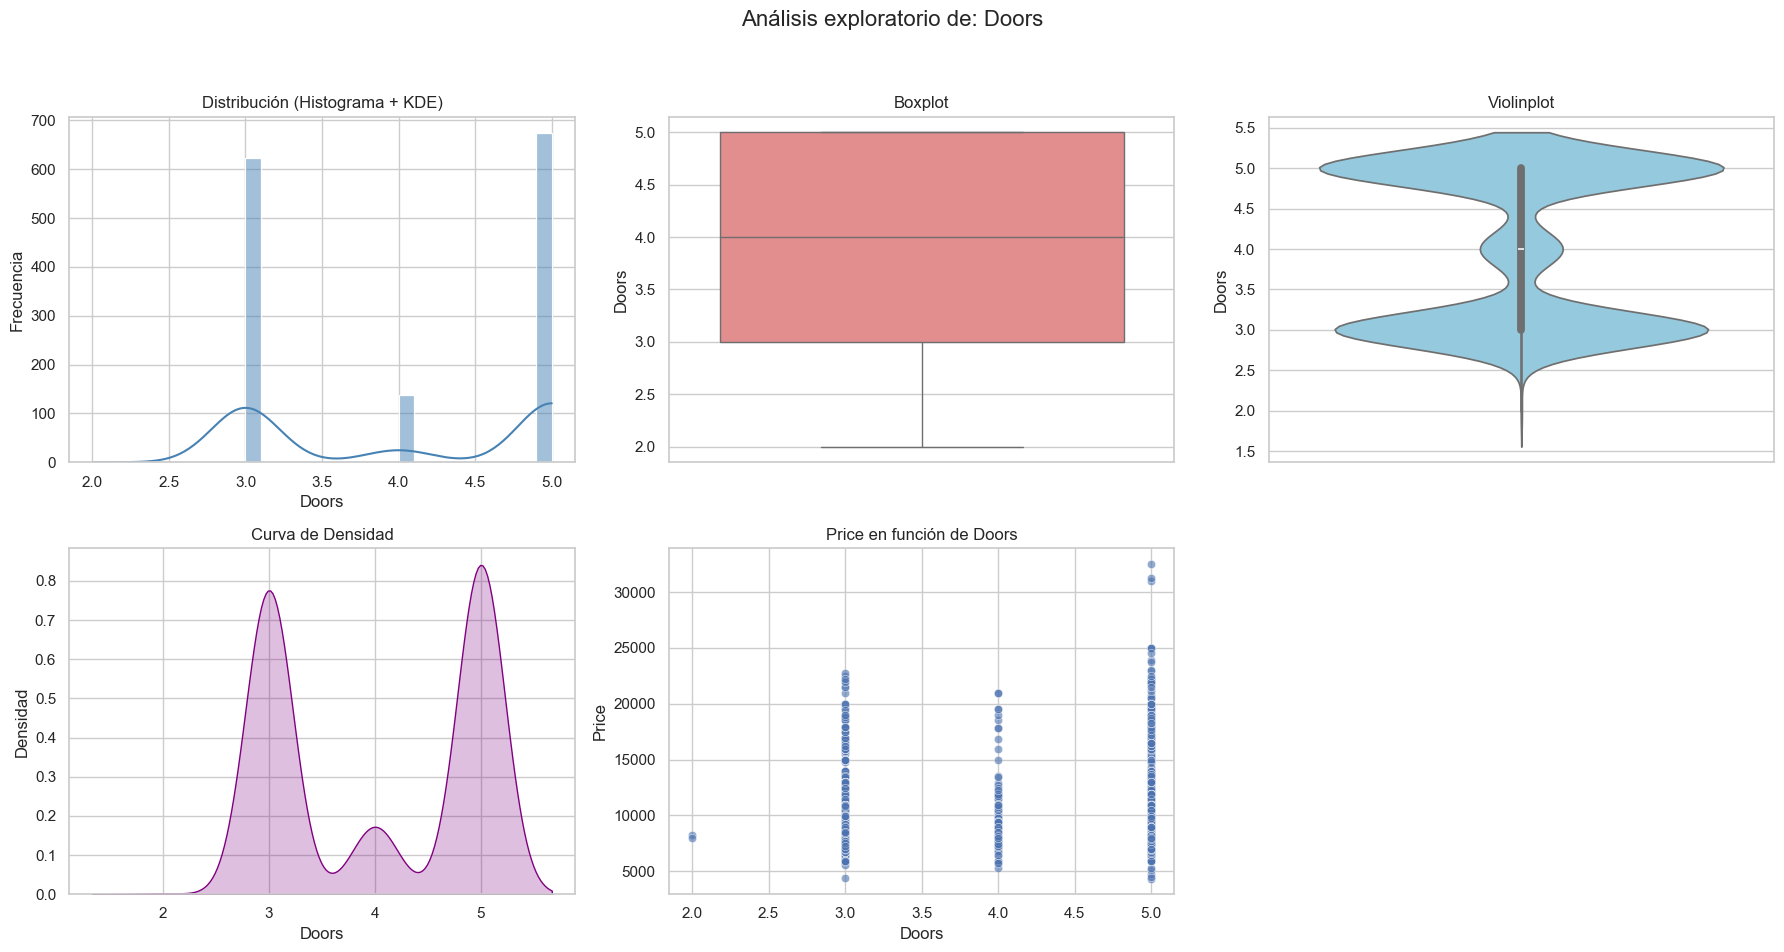

/var/folders/1m/bk2lcr5d2p59b73zyk_lvr000000gn/T/ipykernel_54769/2523630772.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[col].dropna(), ax=axs[1, 0], fill=True, color="purple")


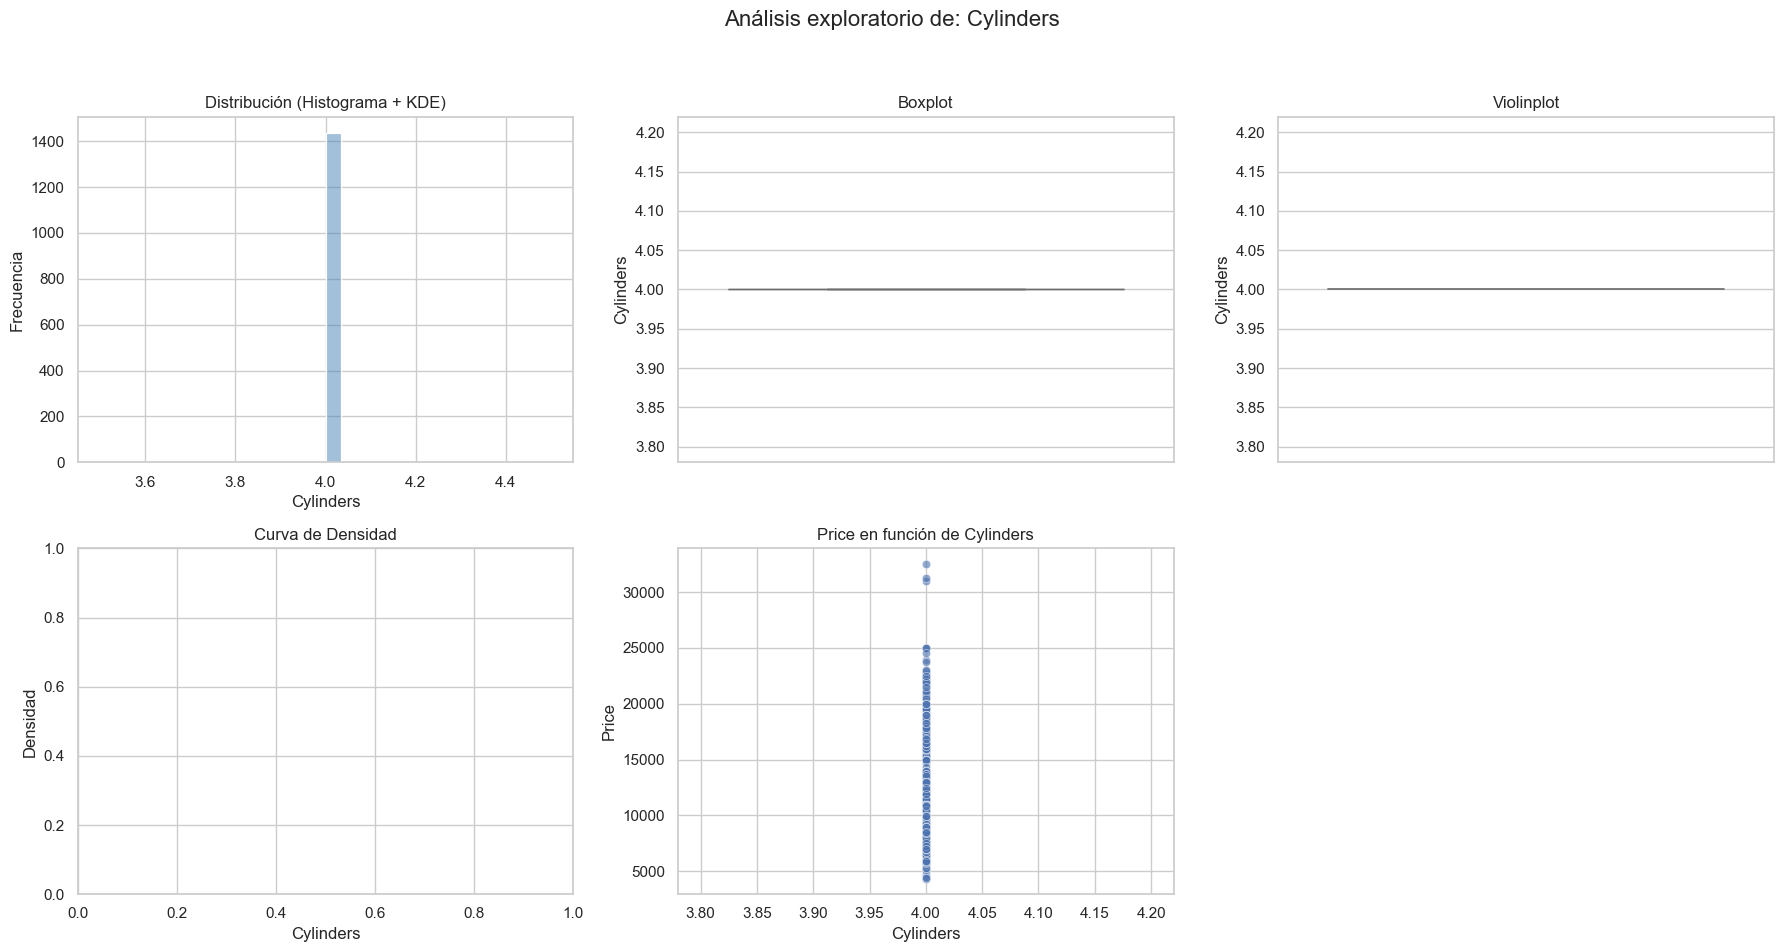

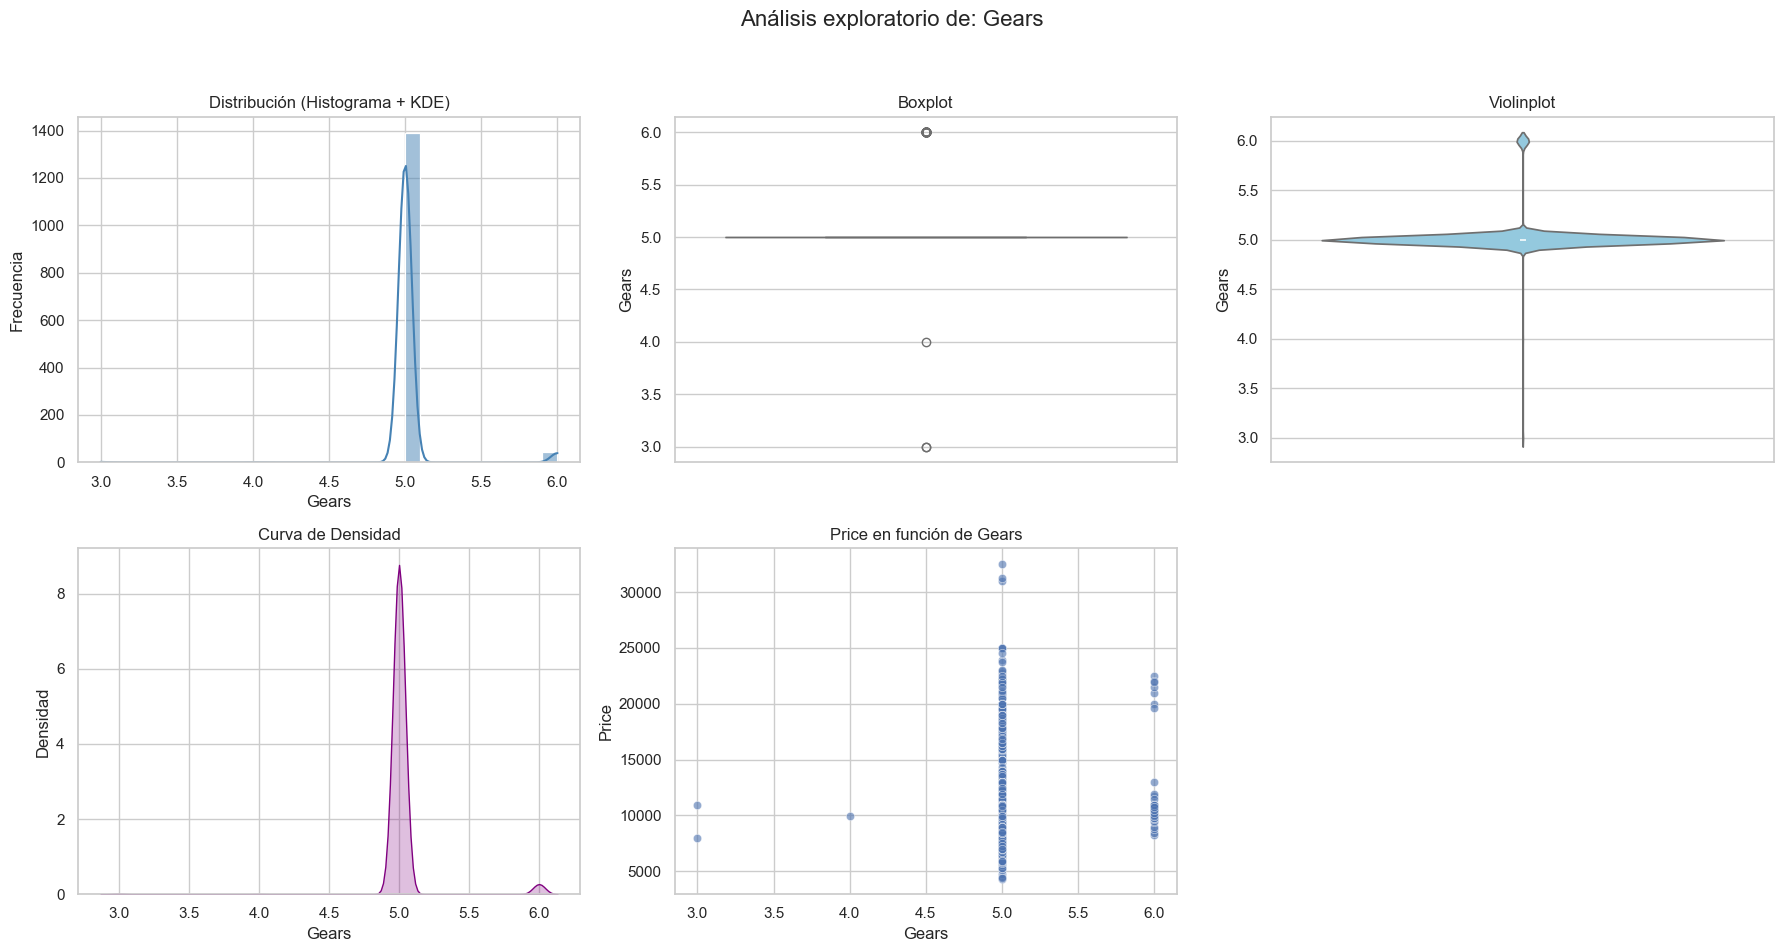

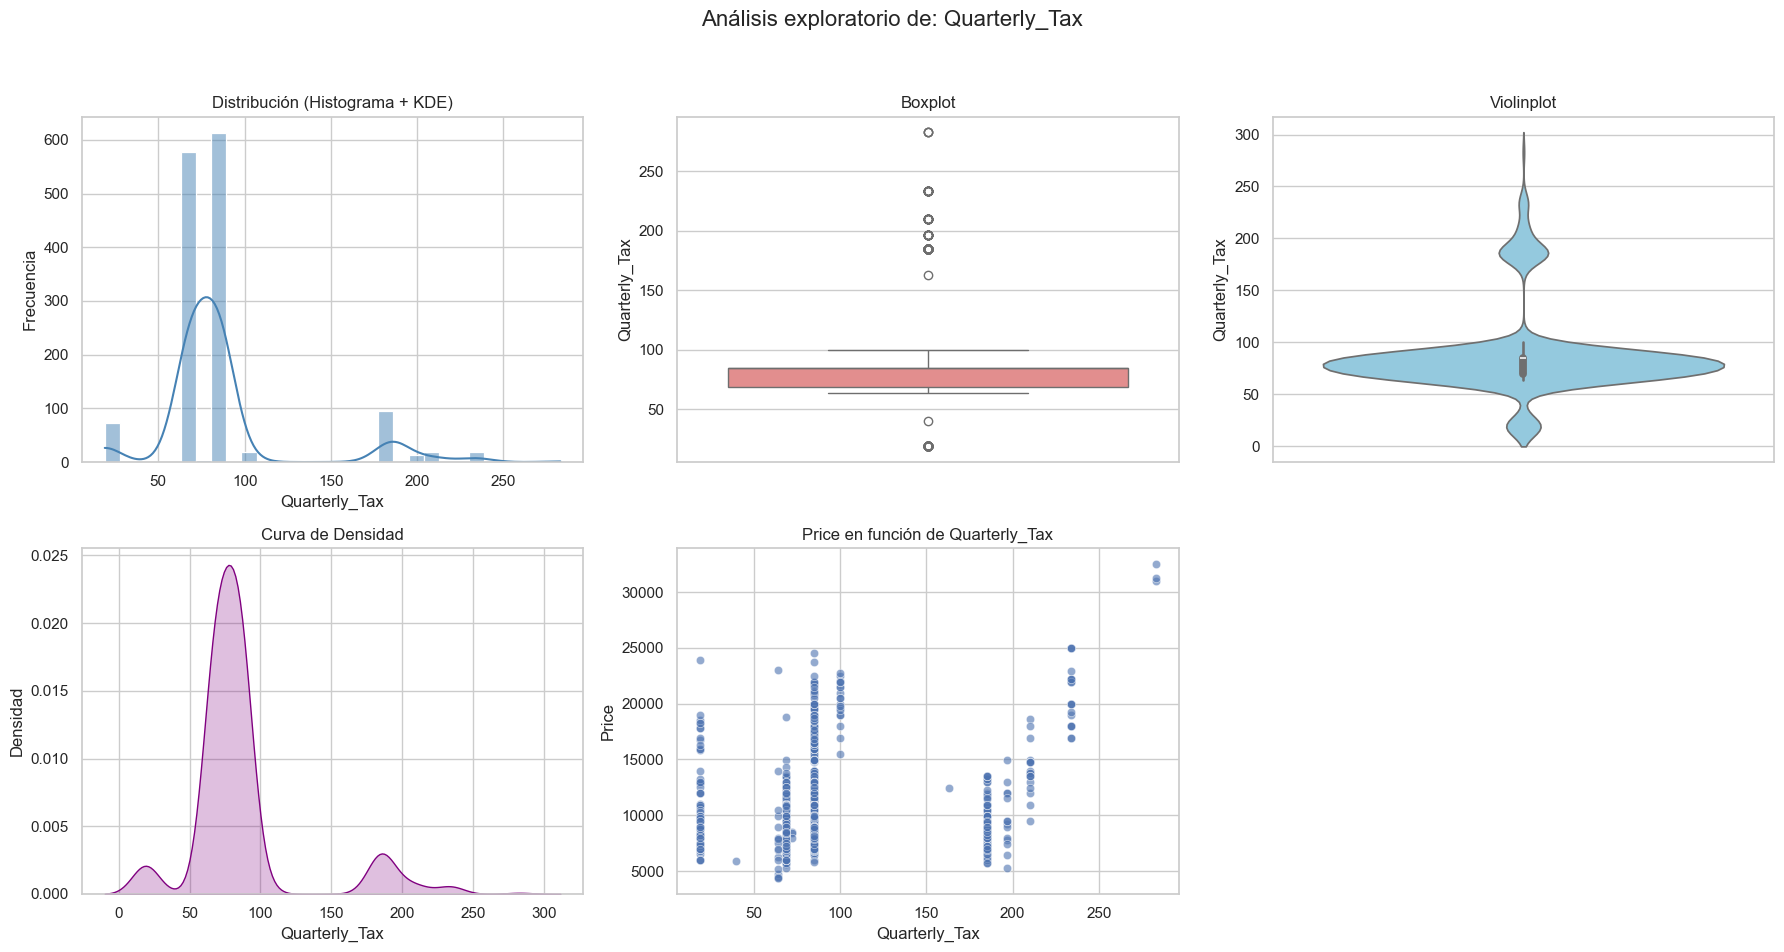

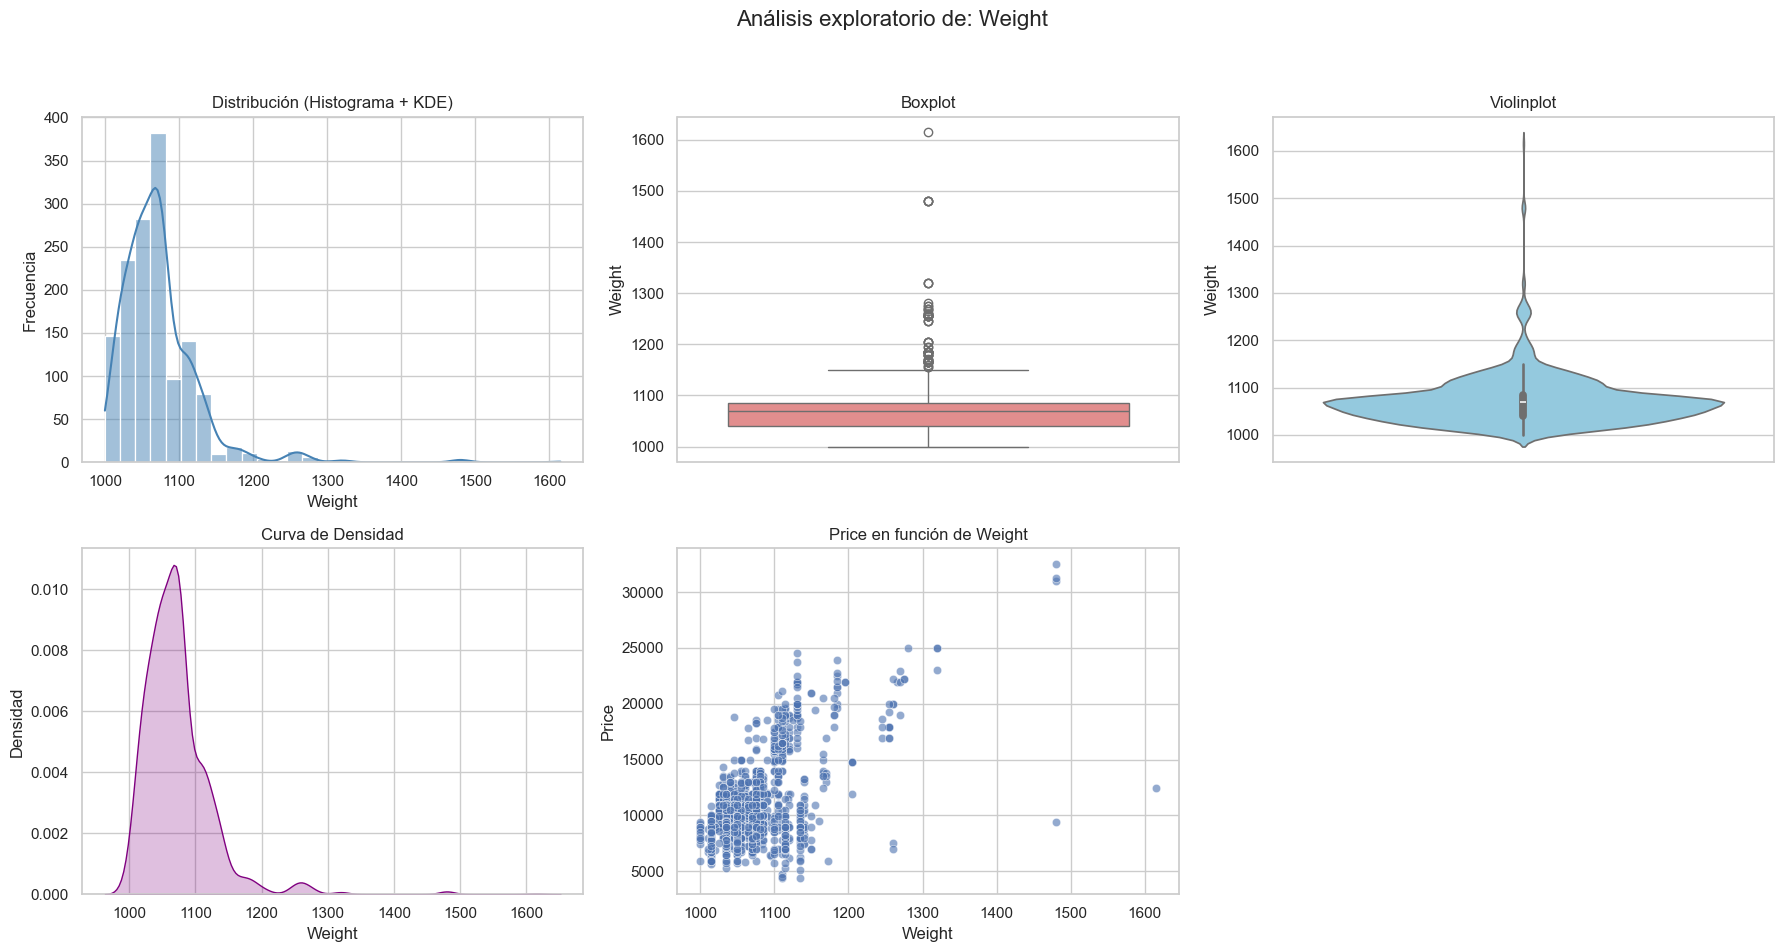

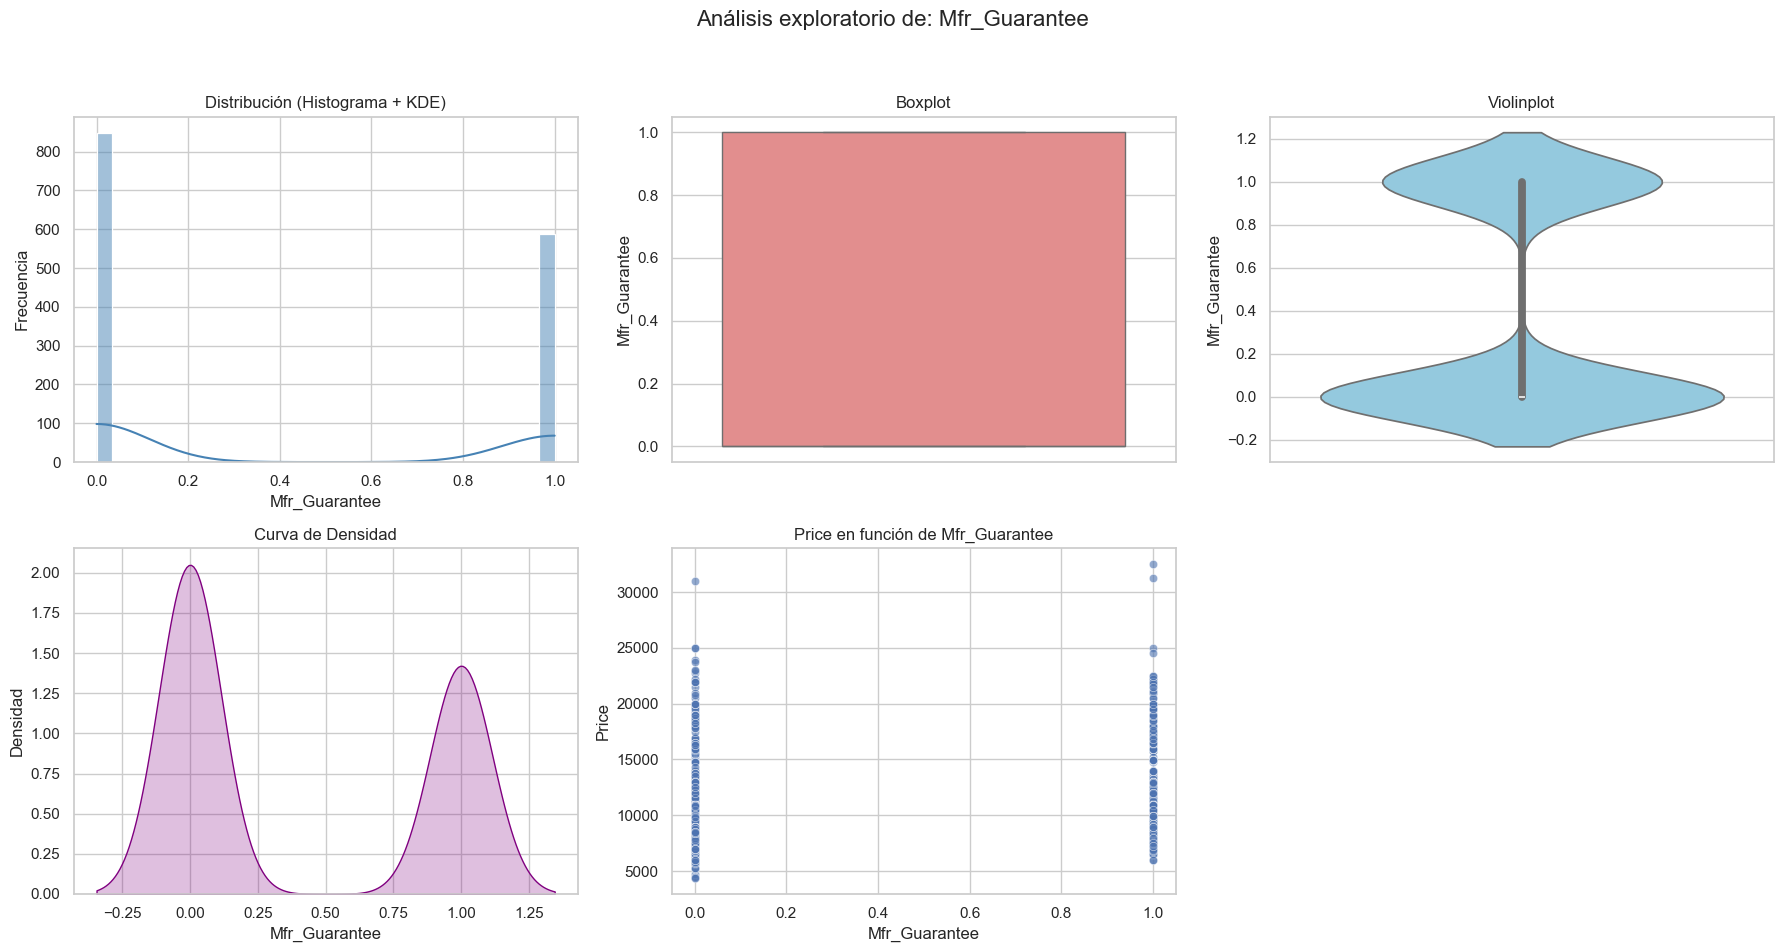

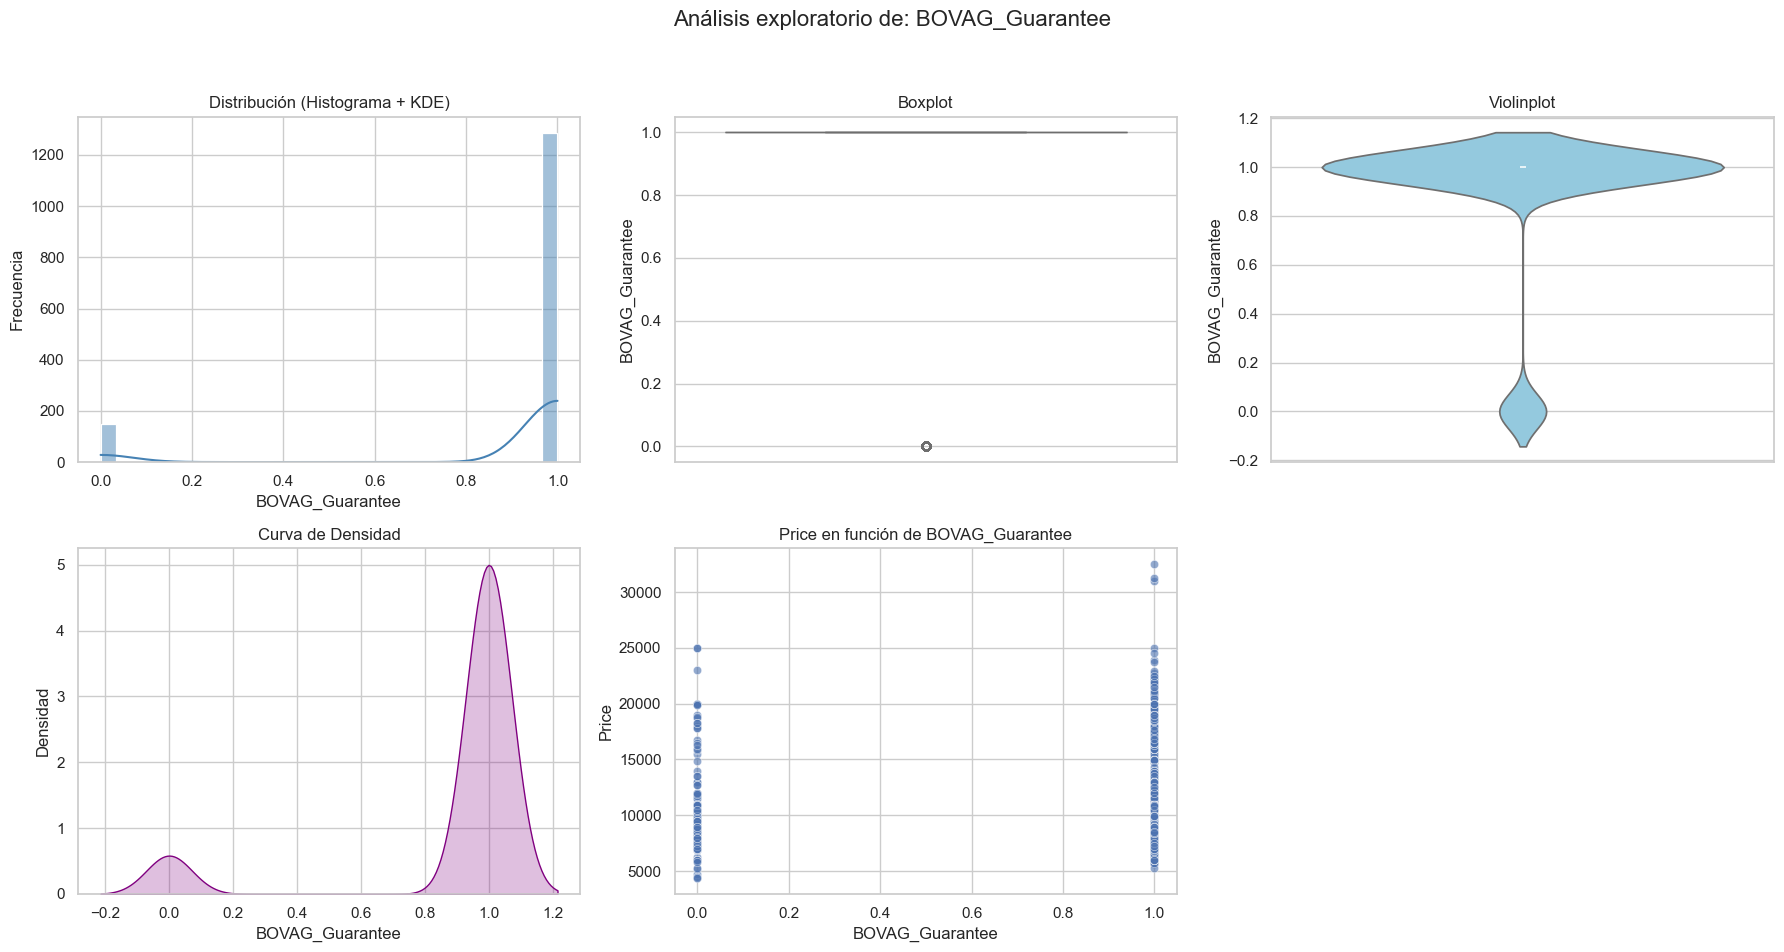

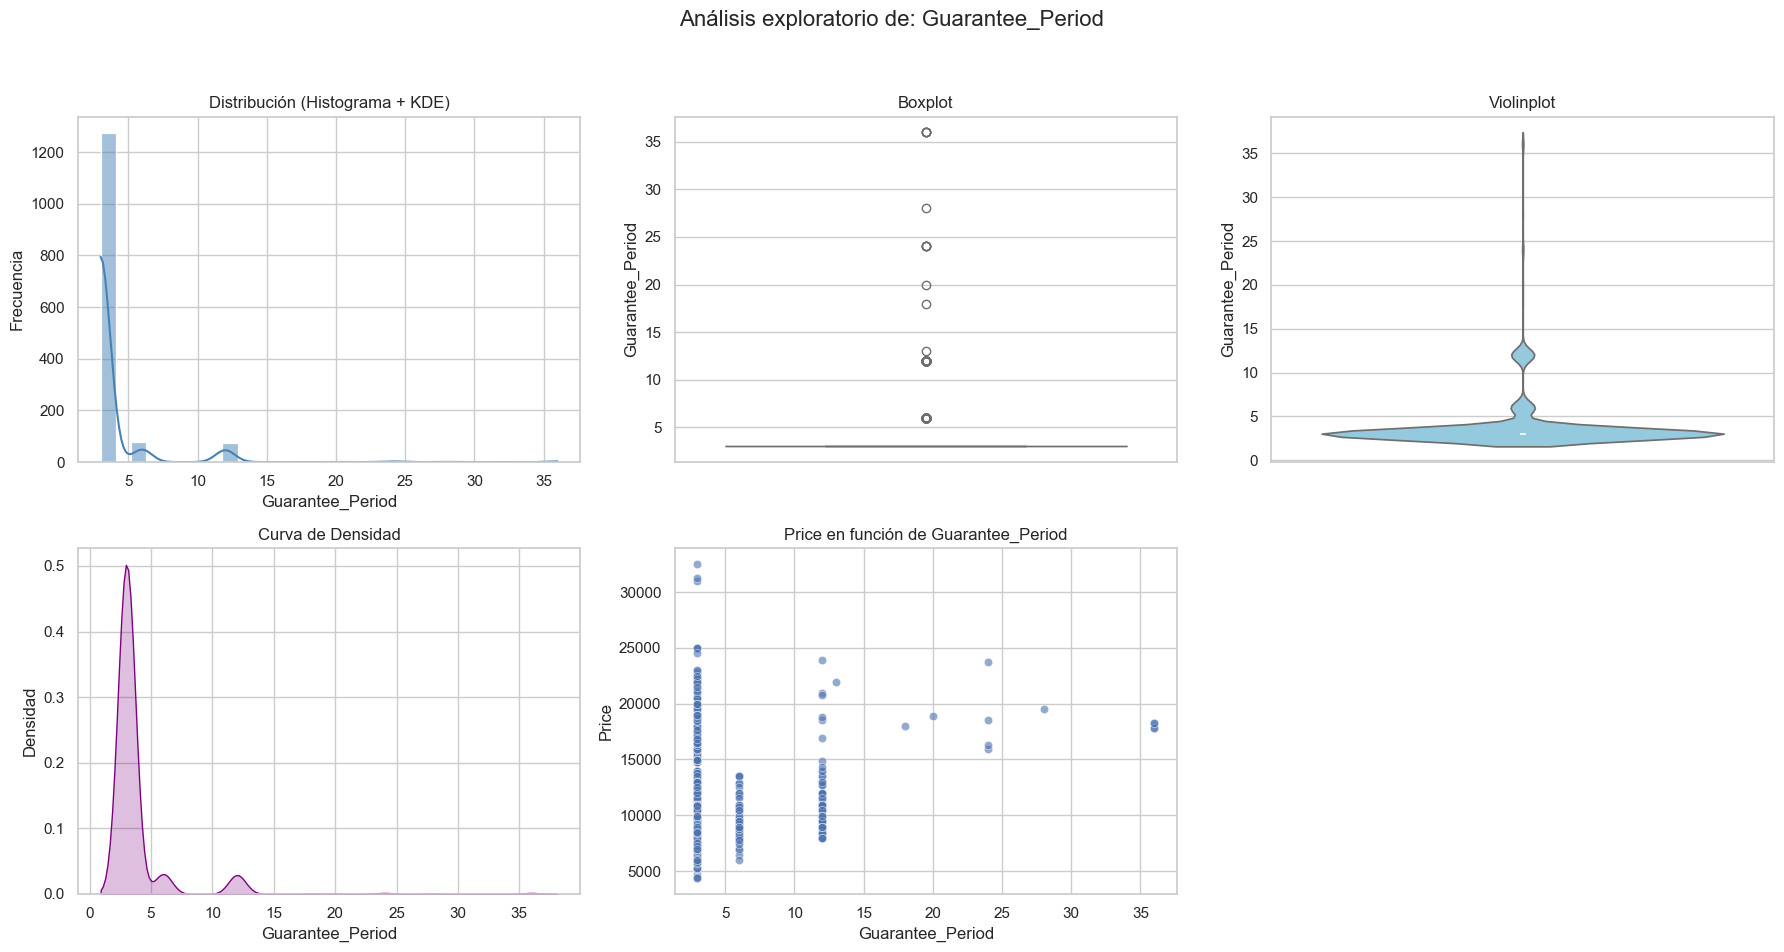

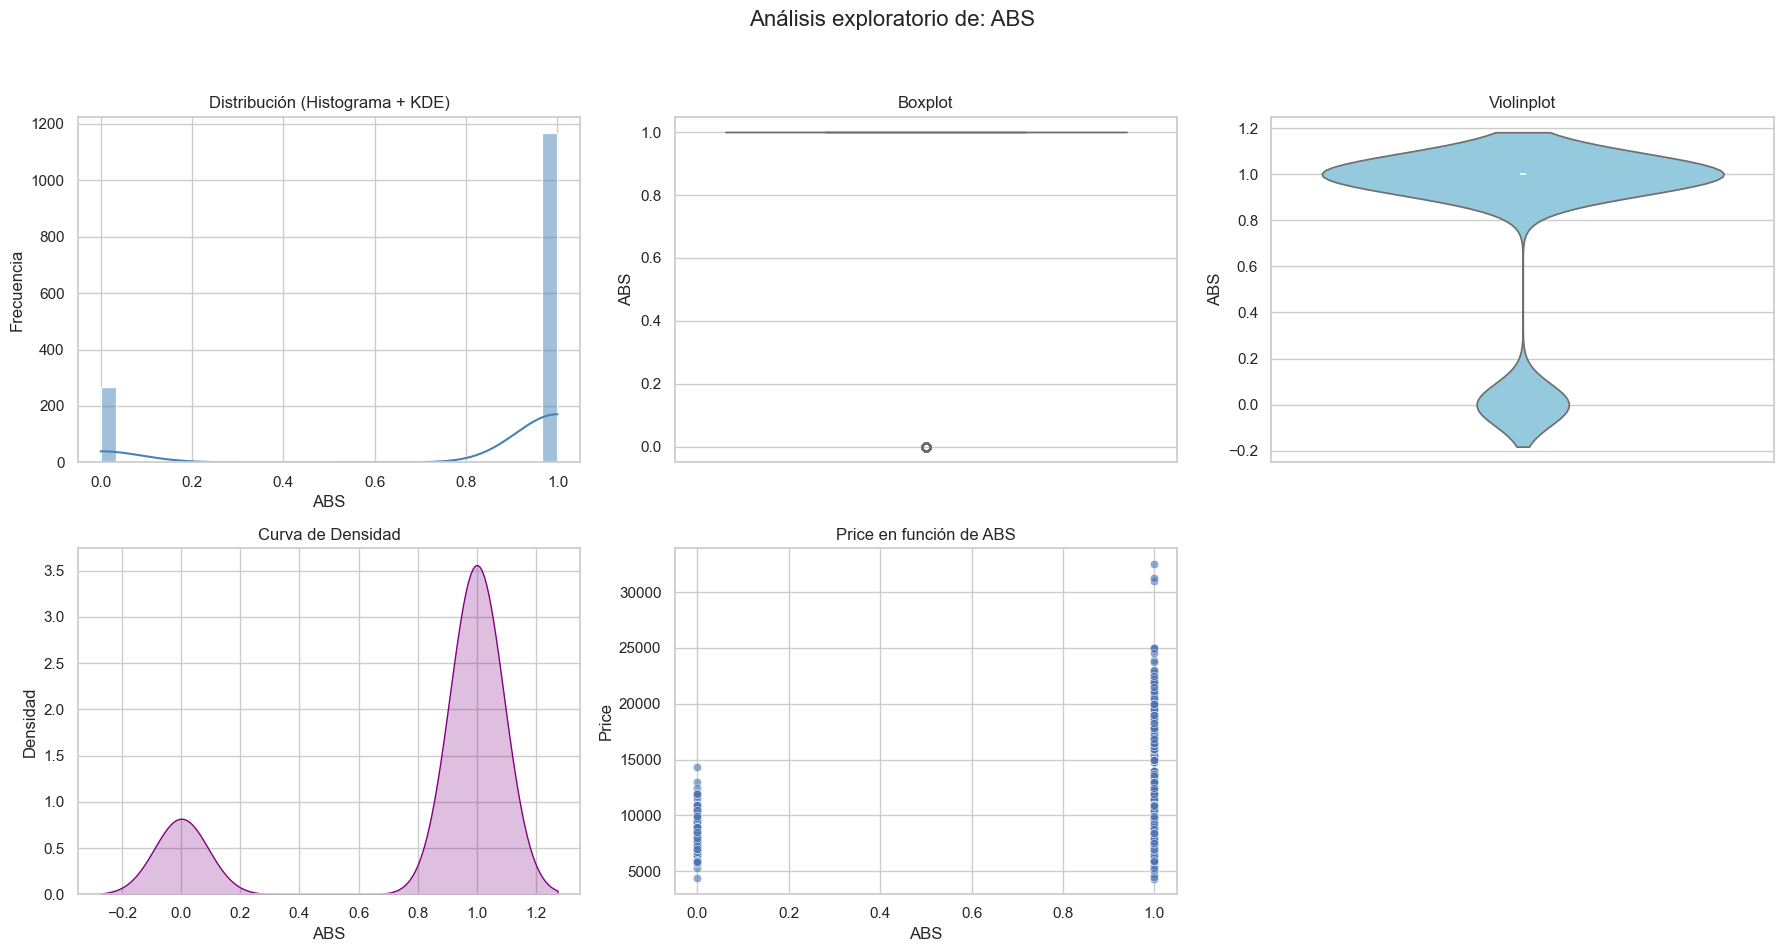

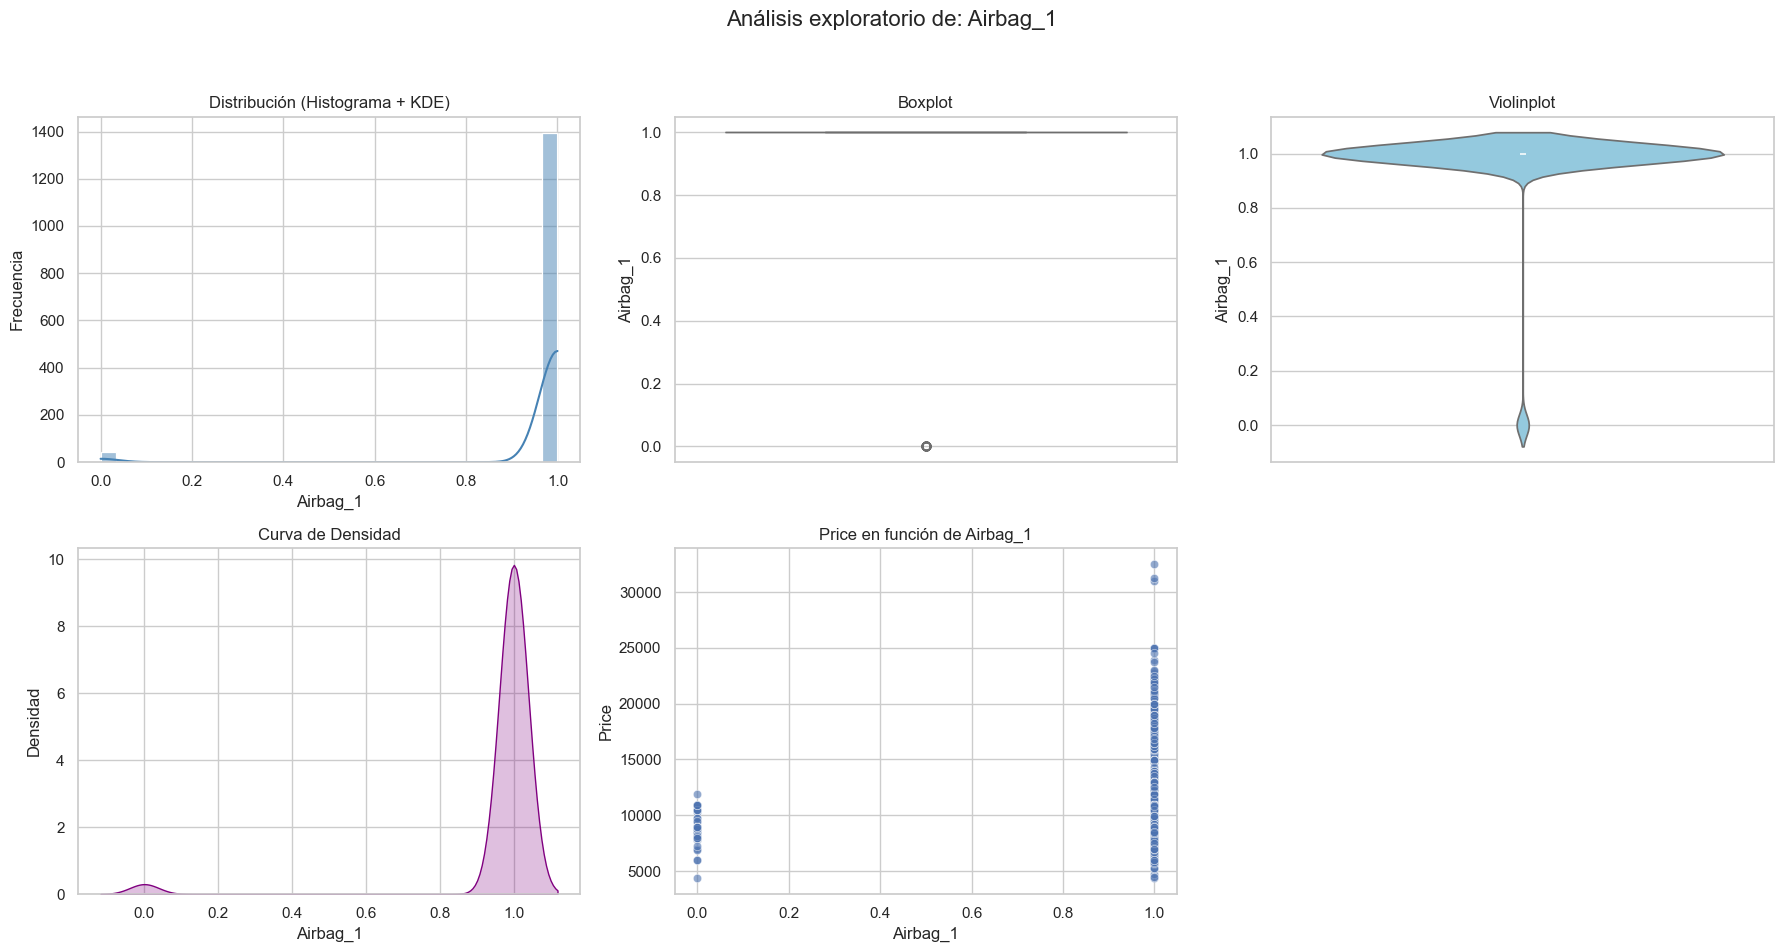

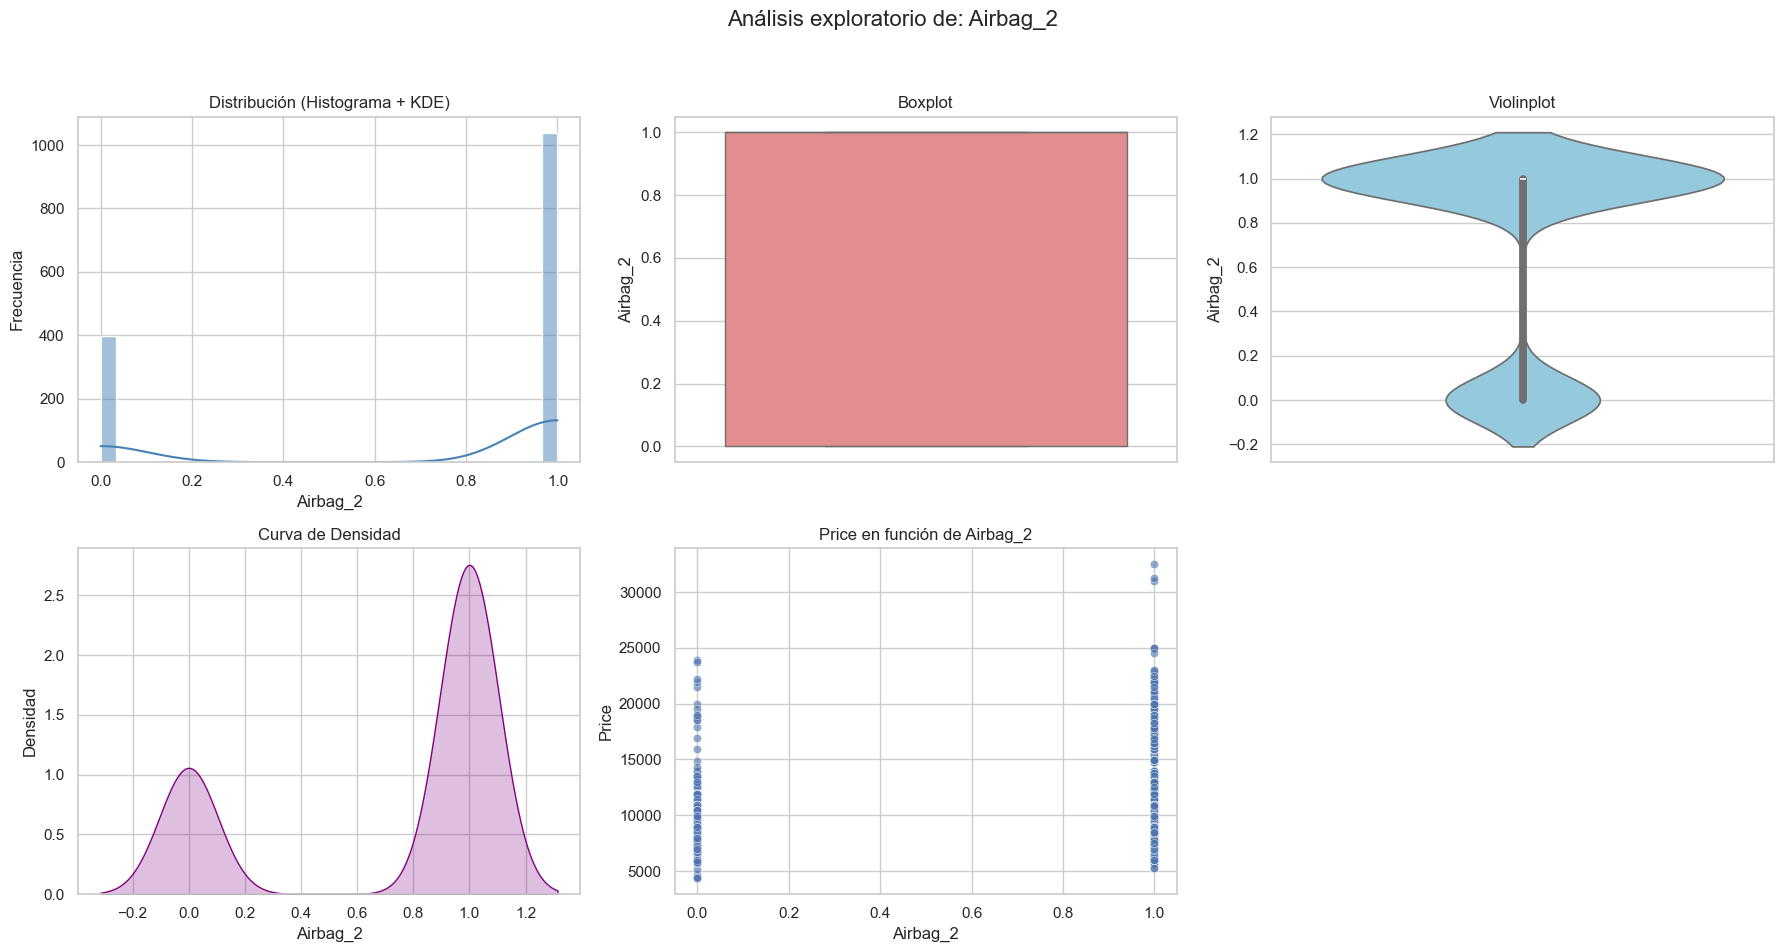

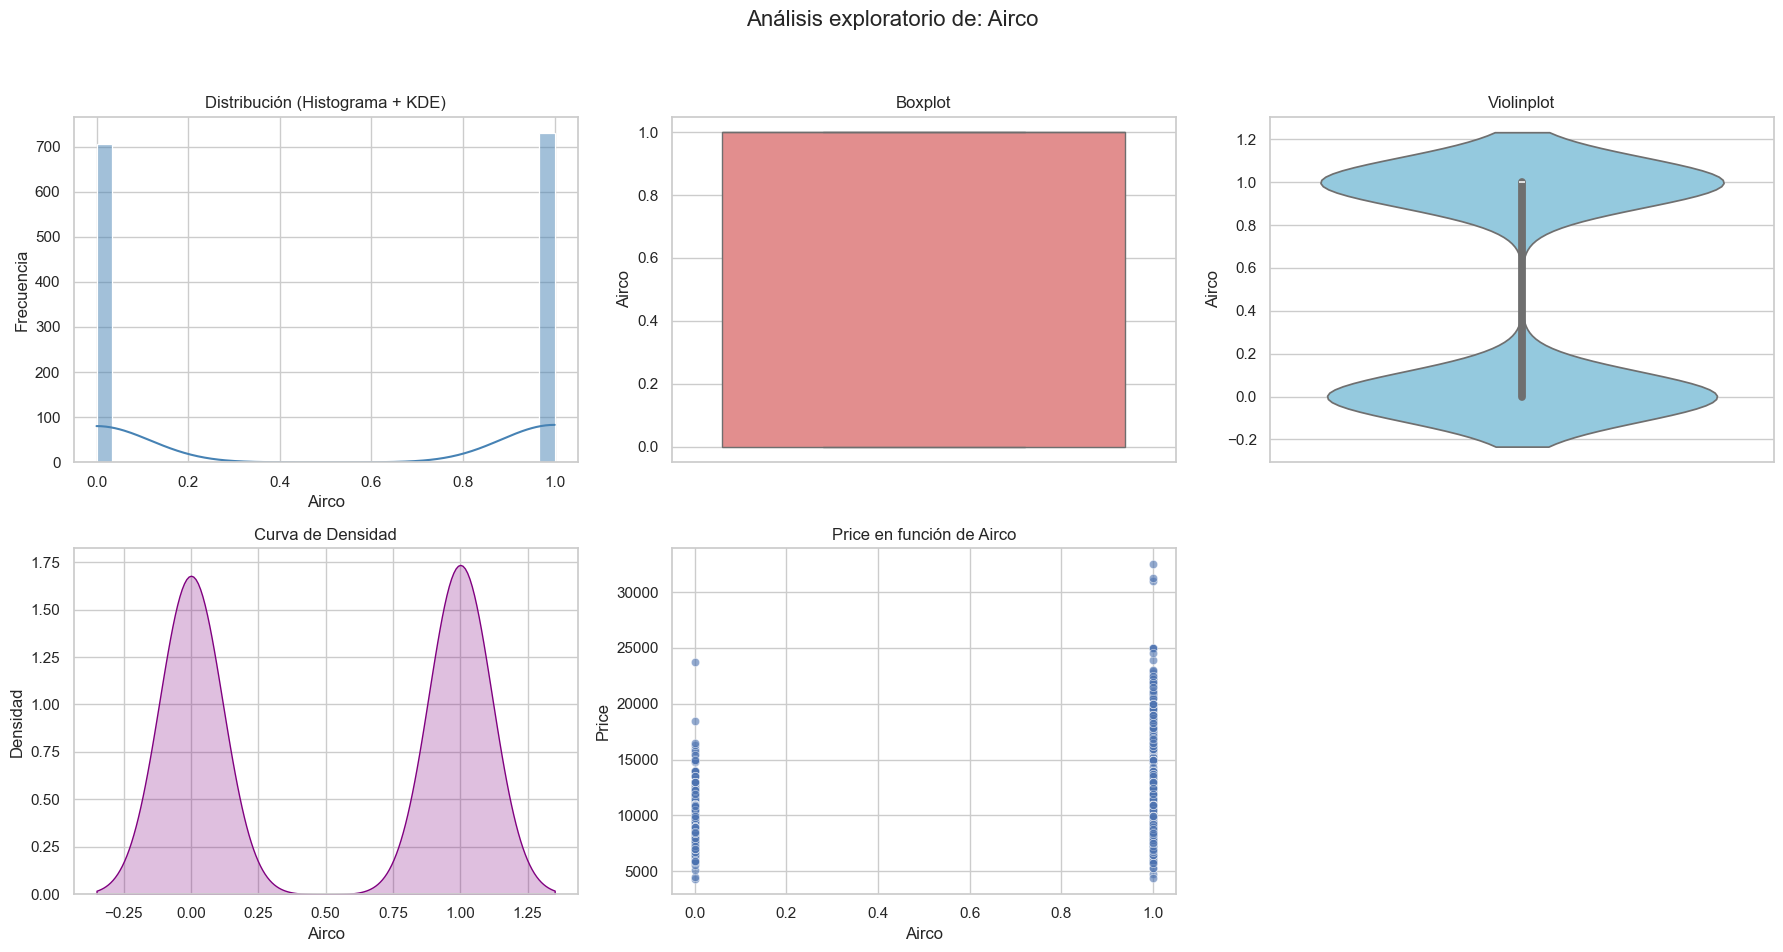

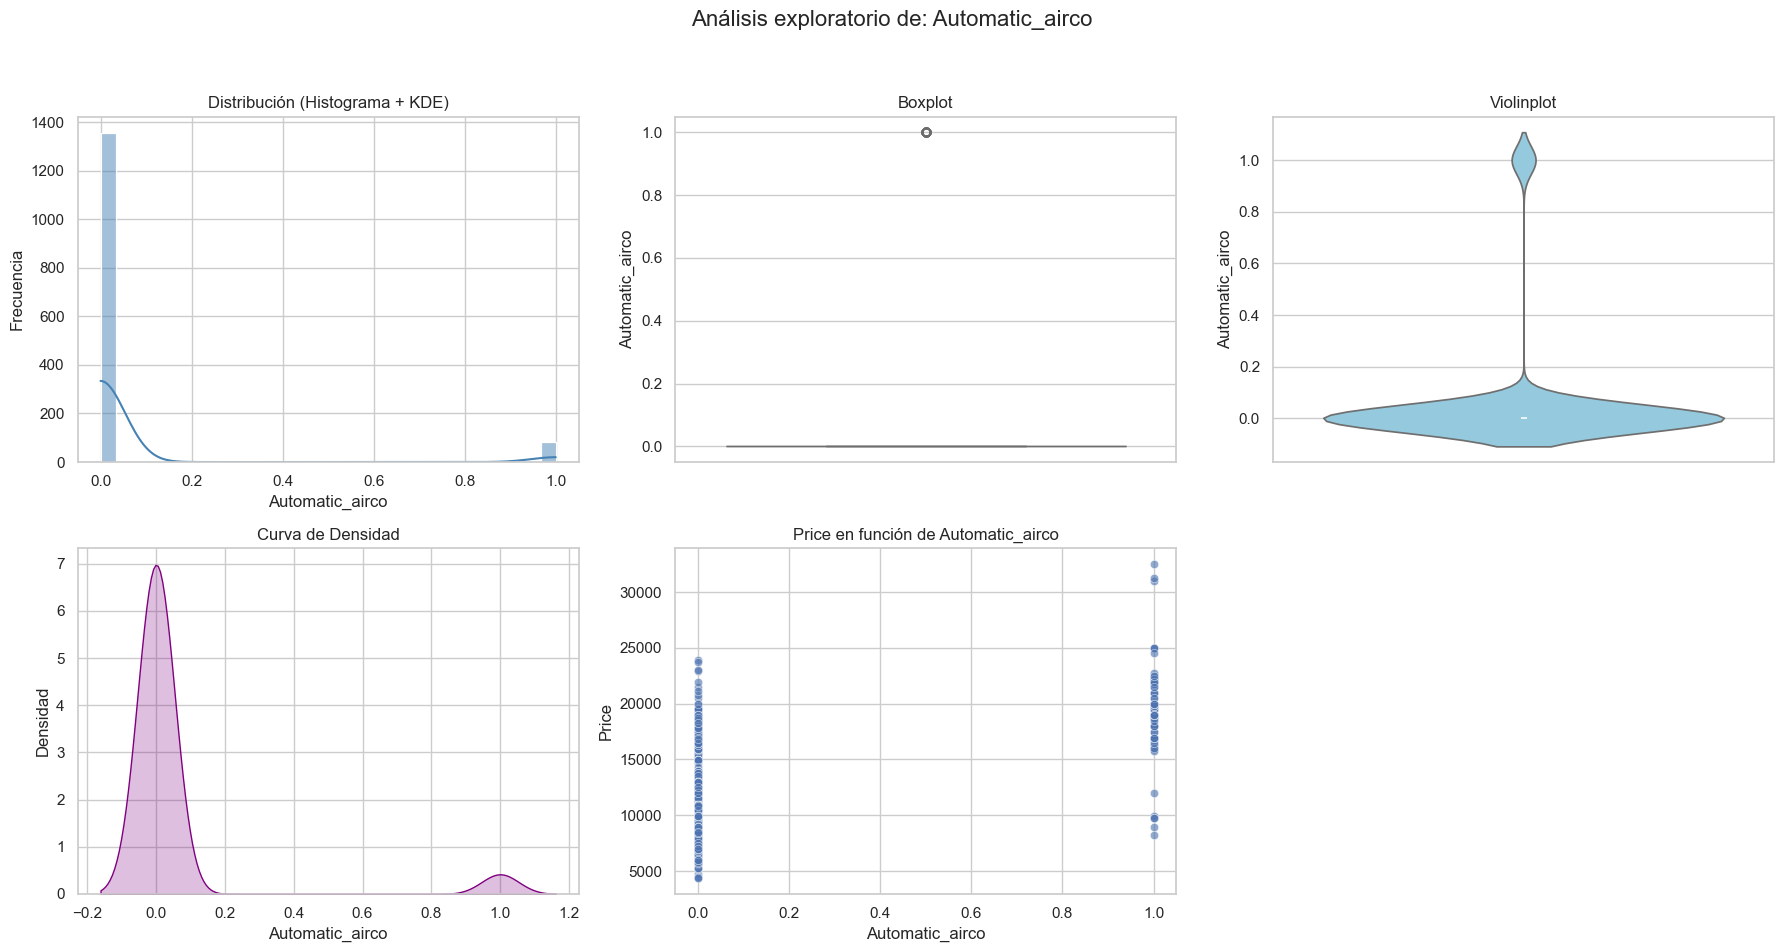

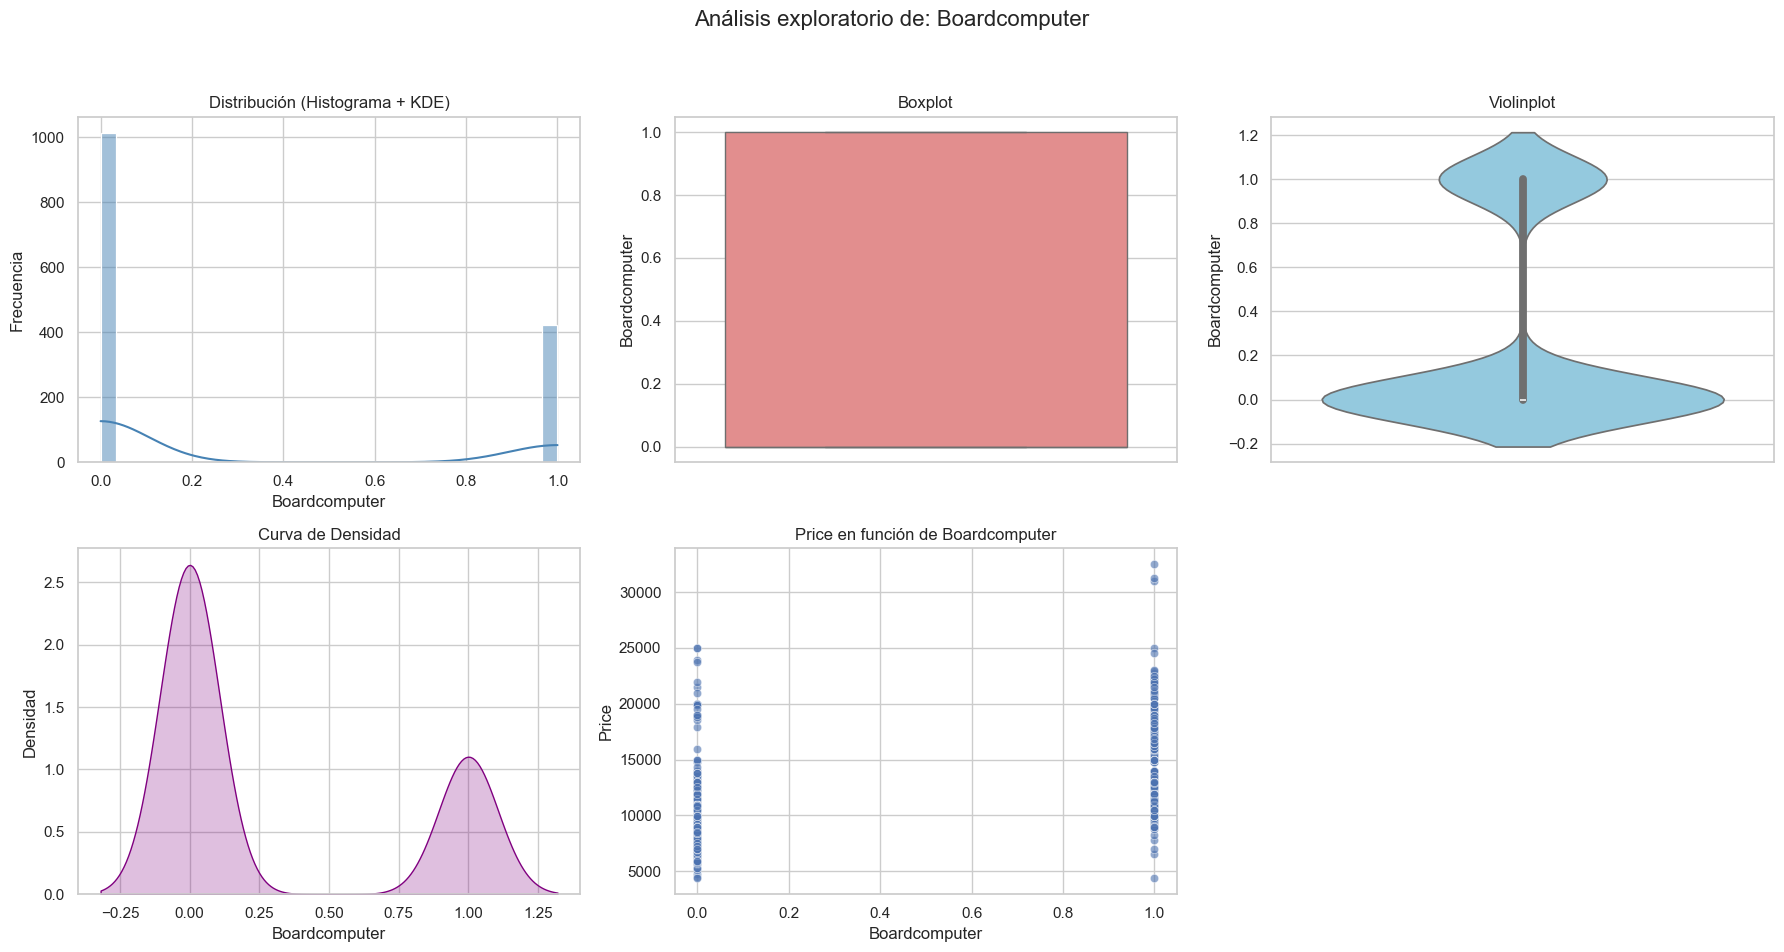

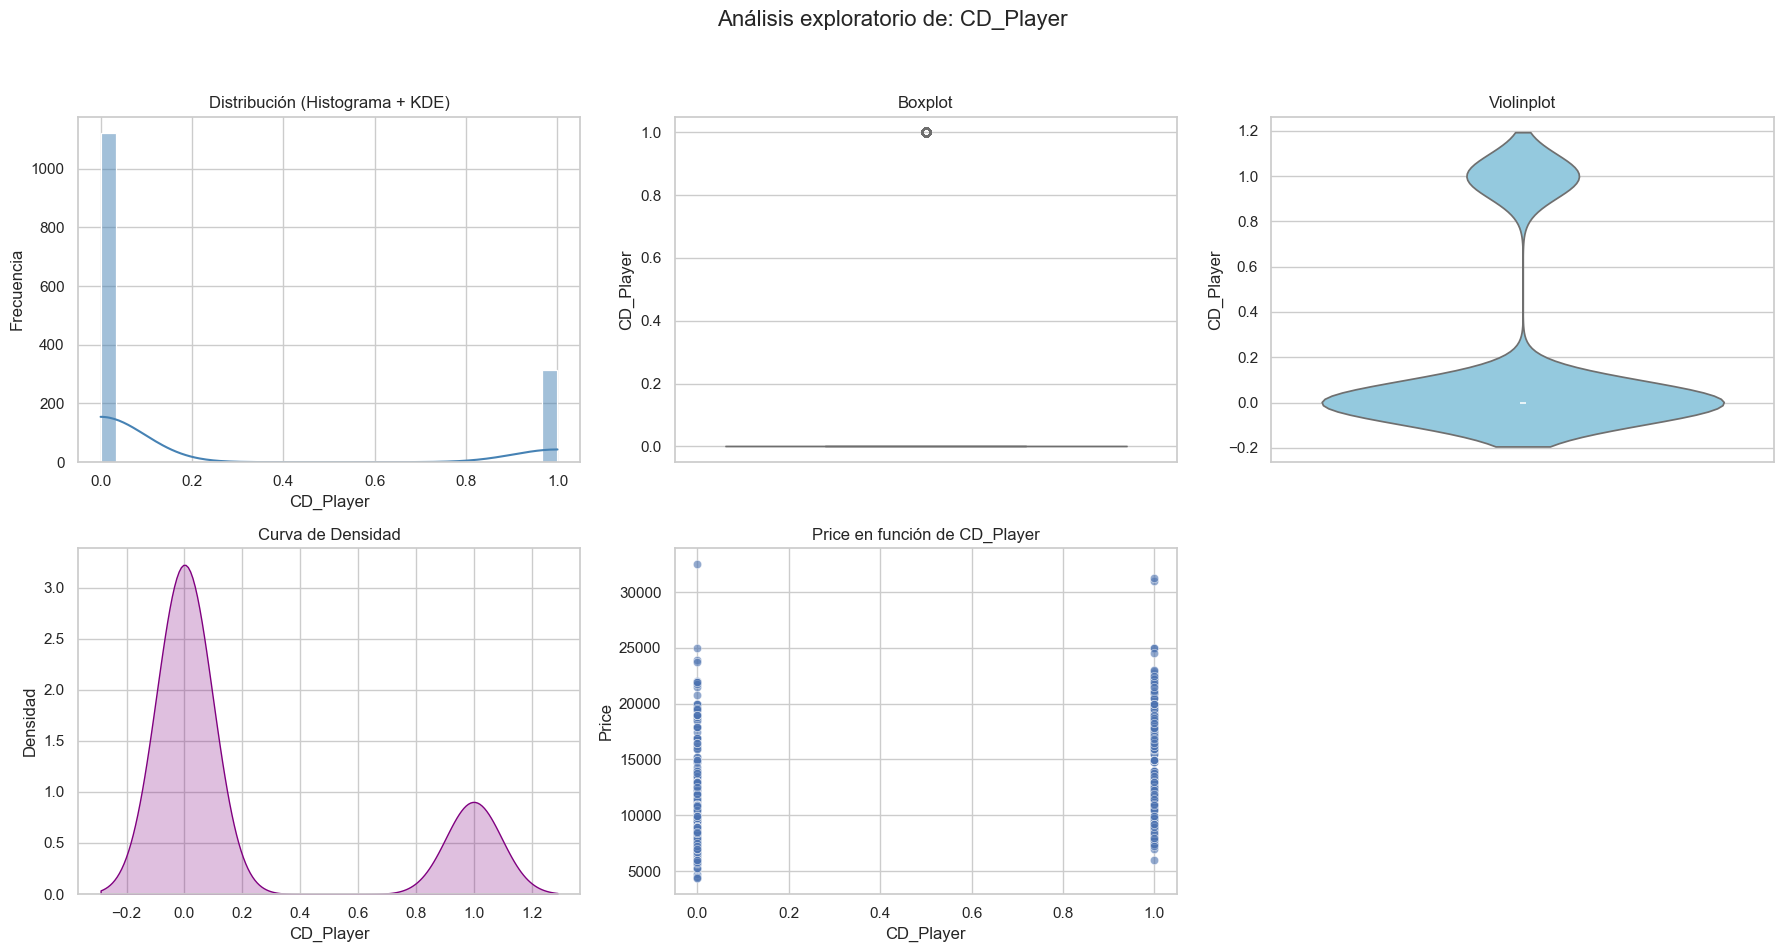

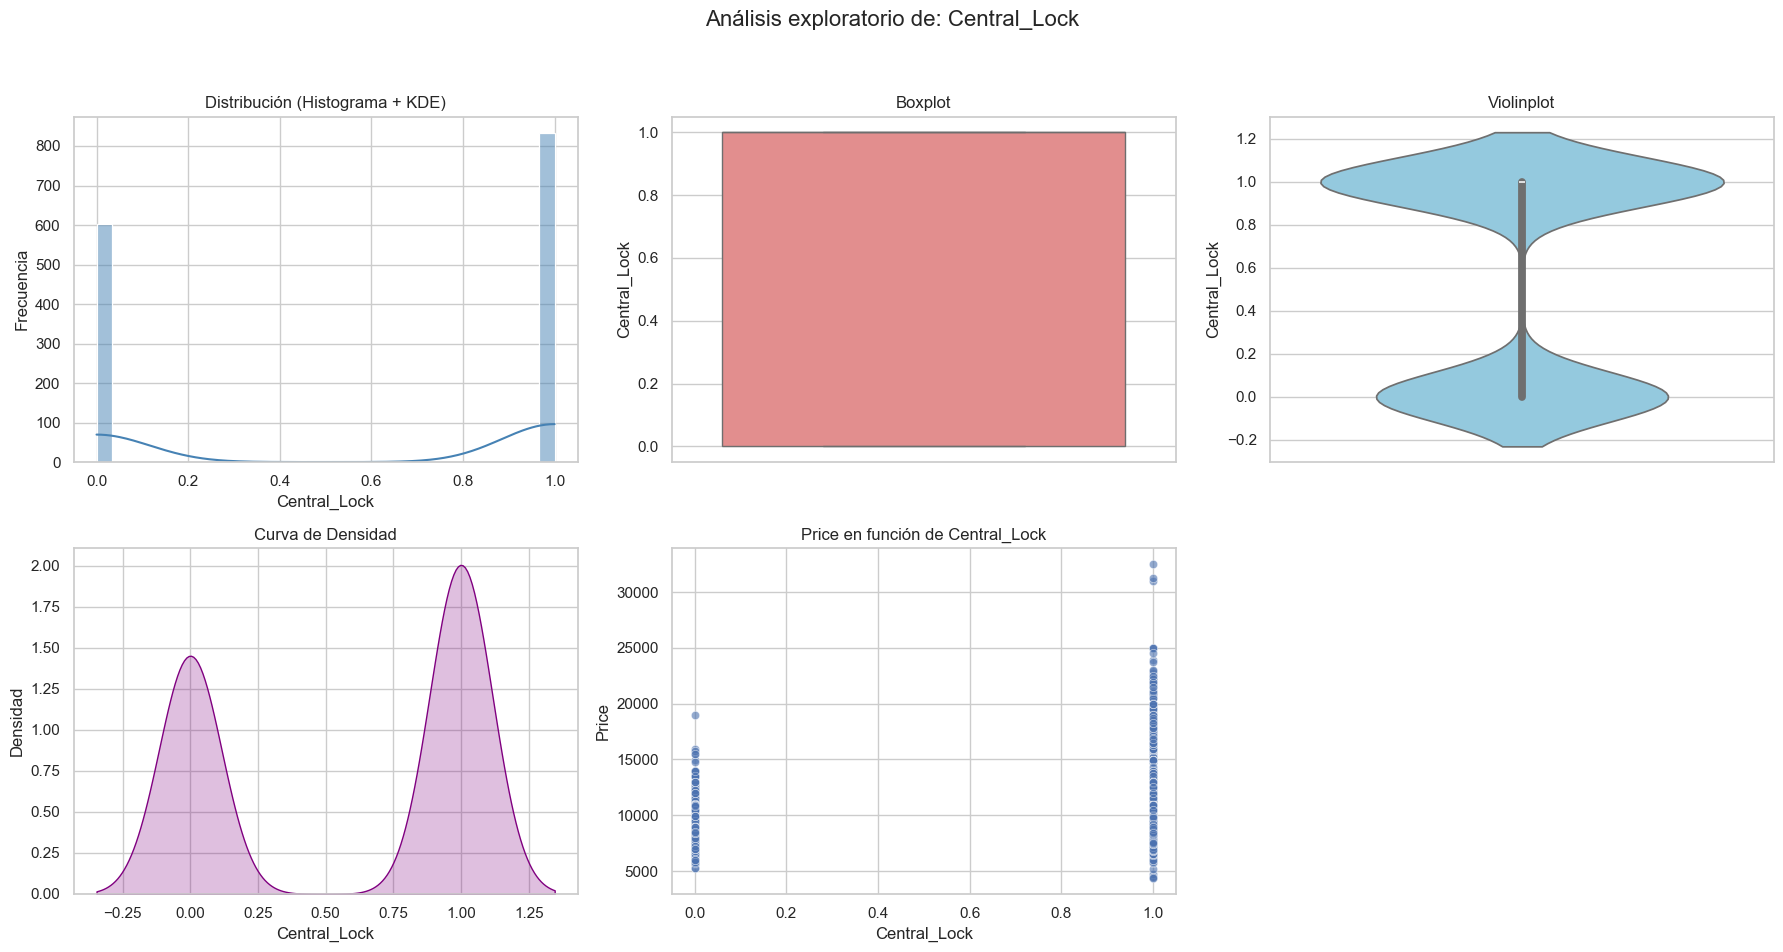

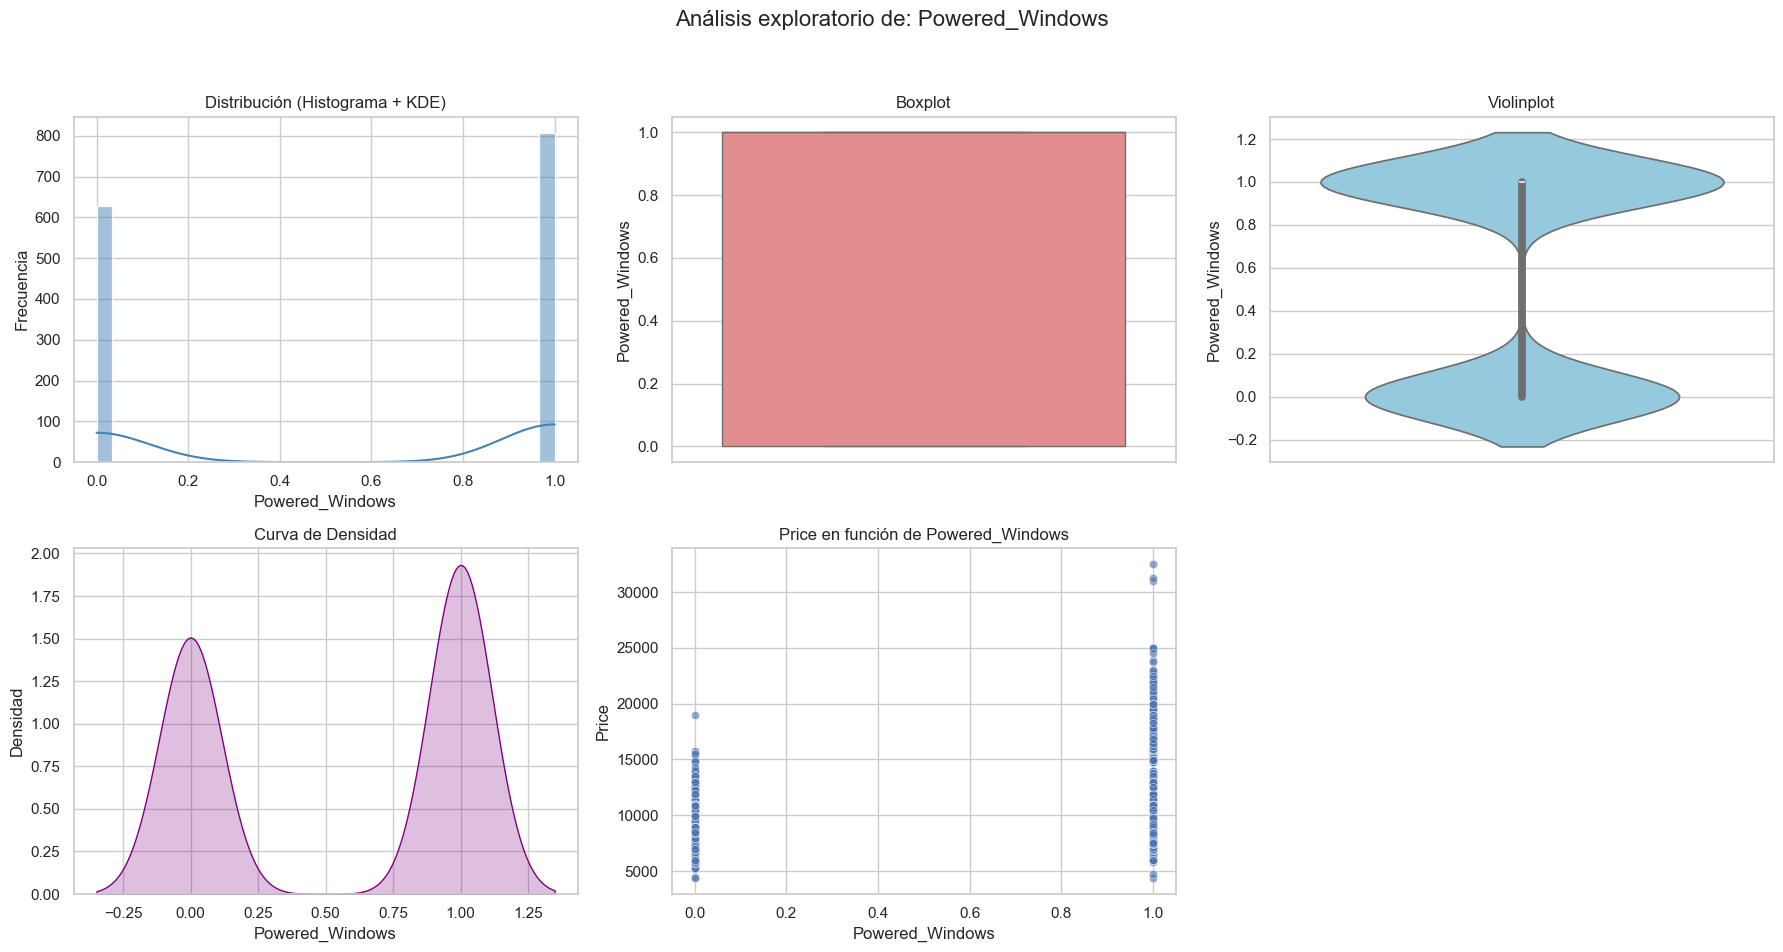

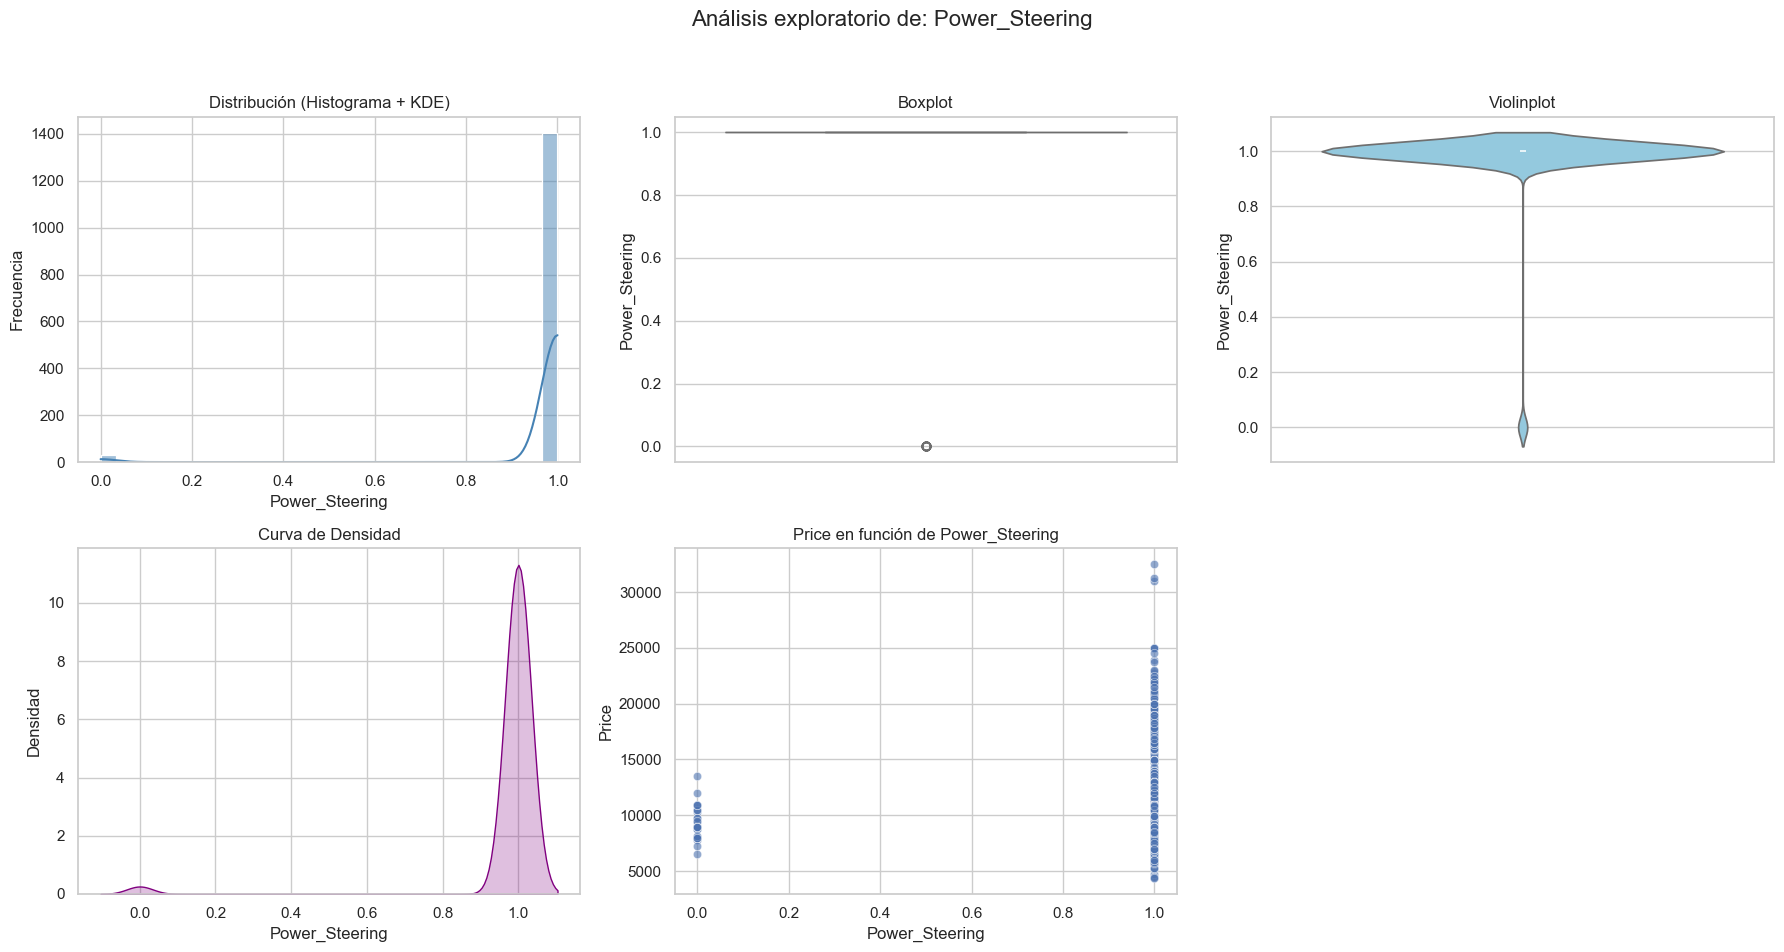

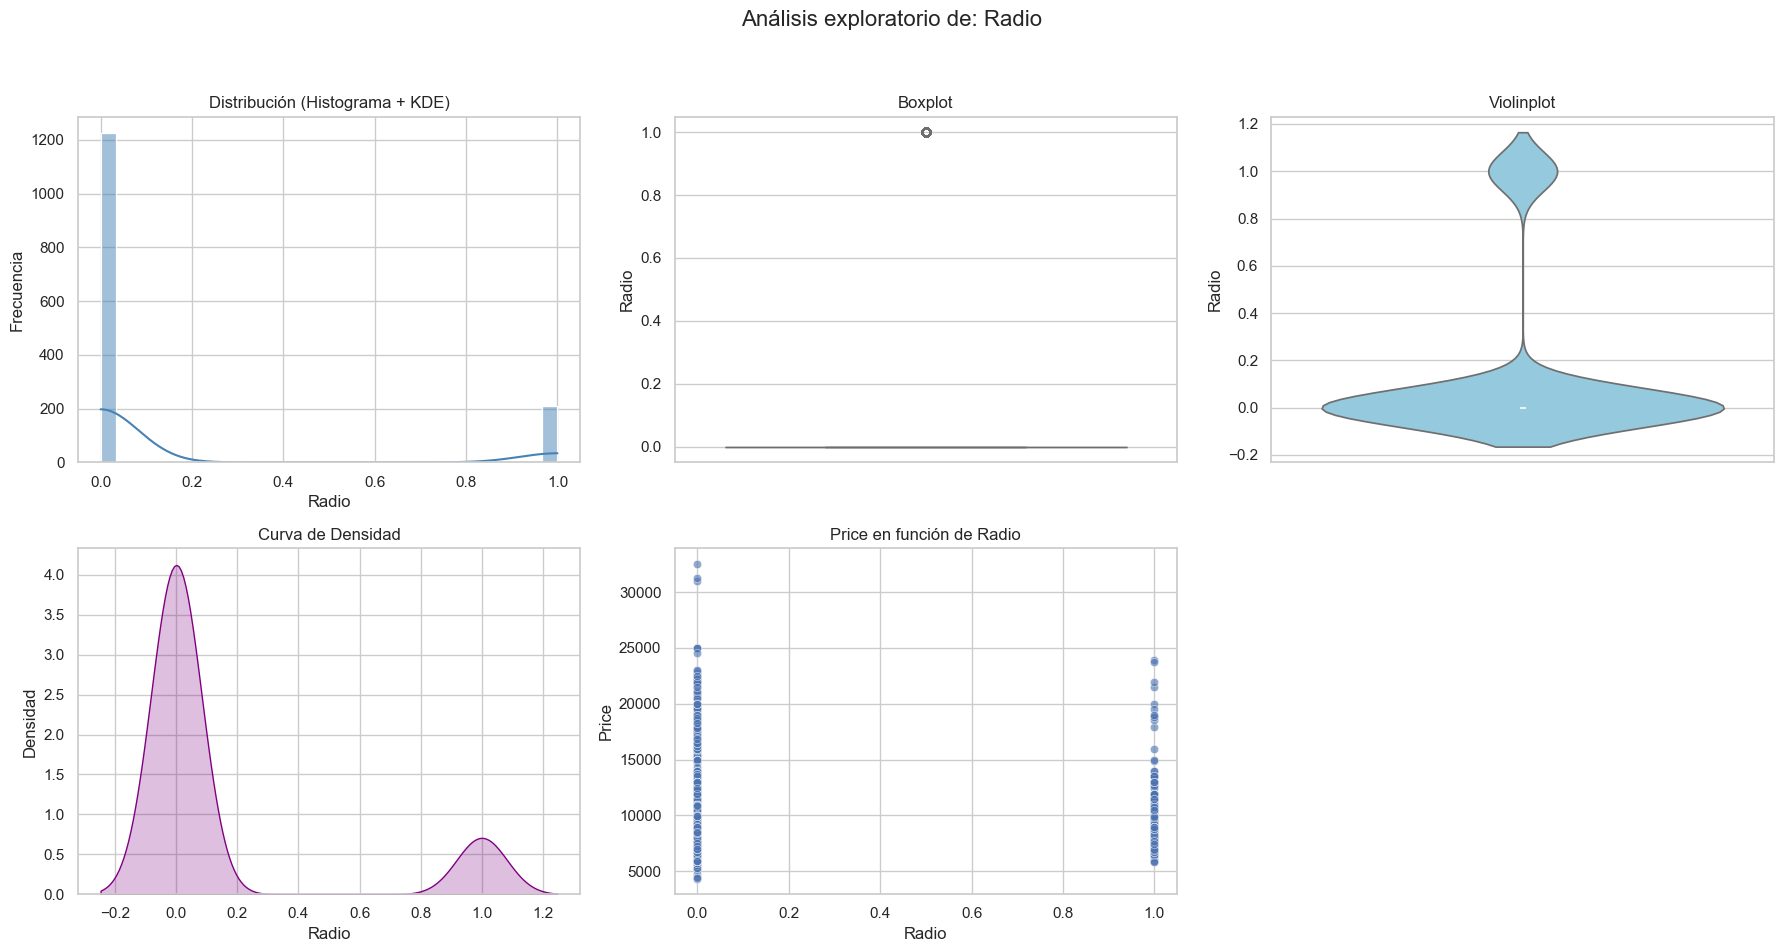

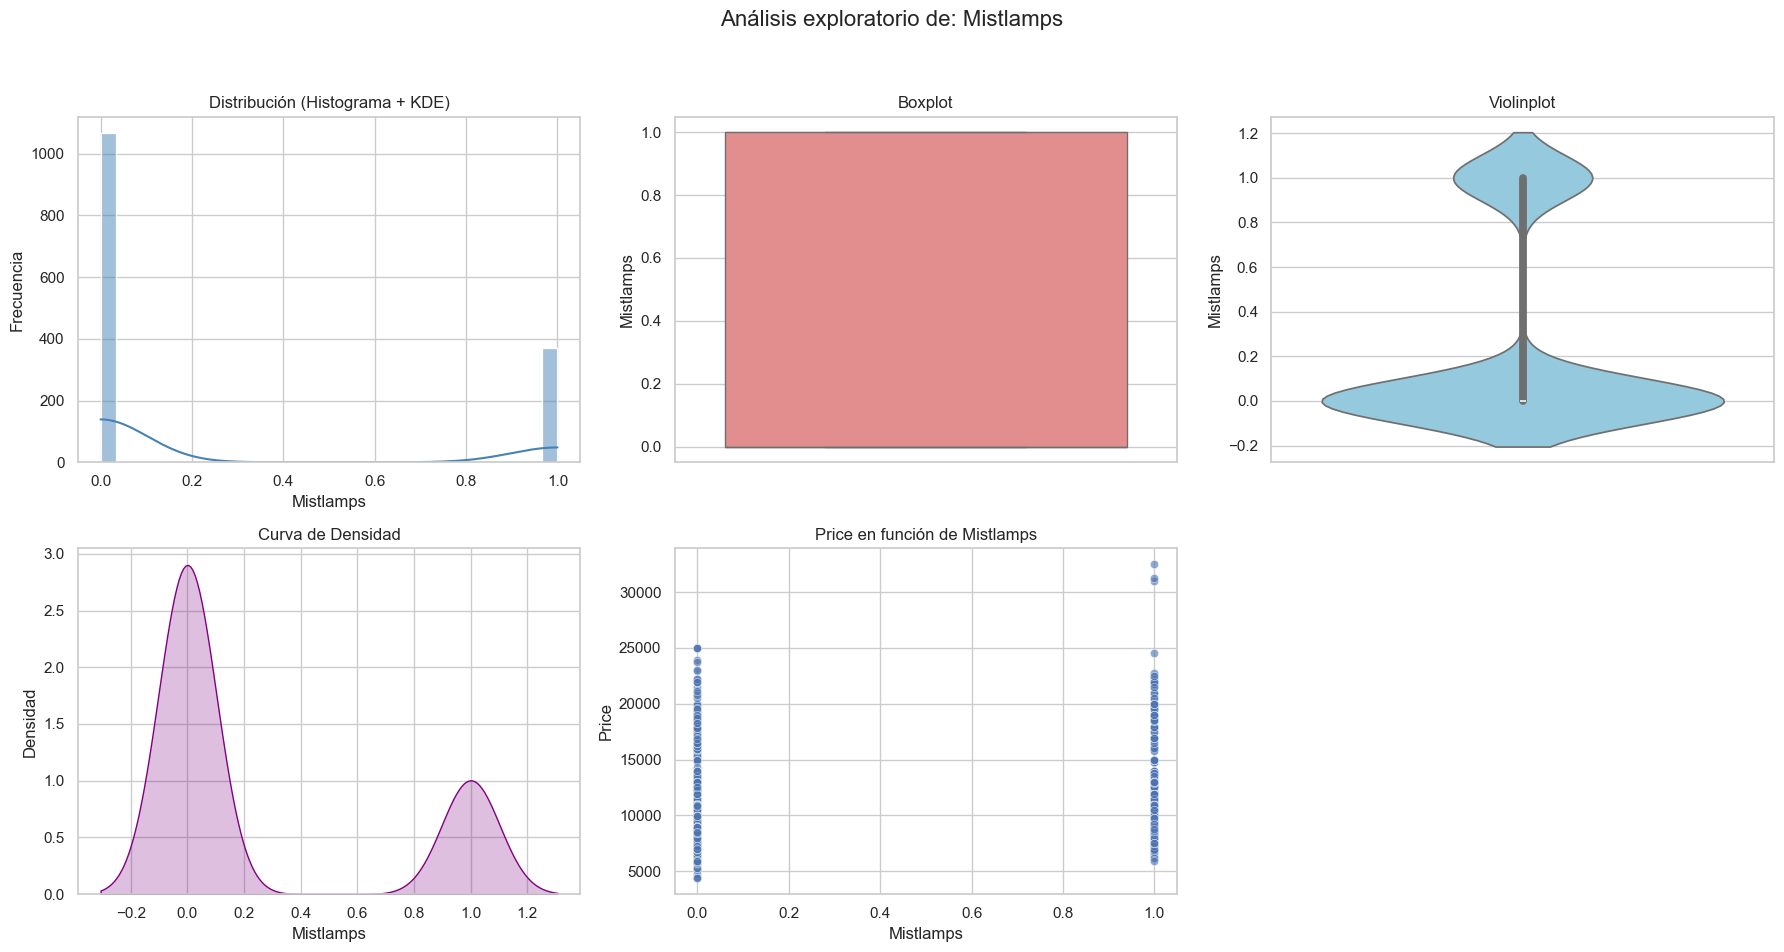

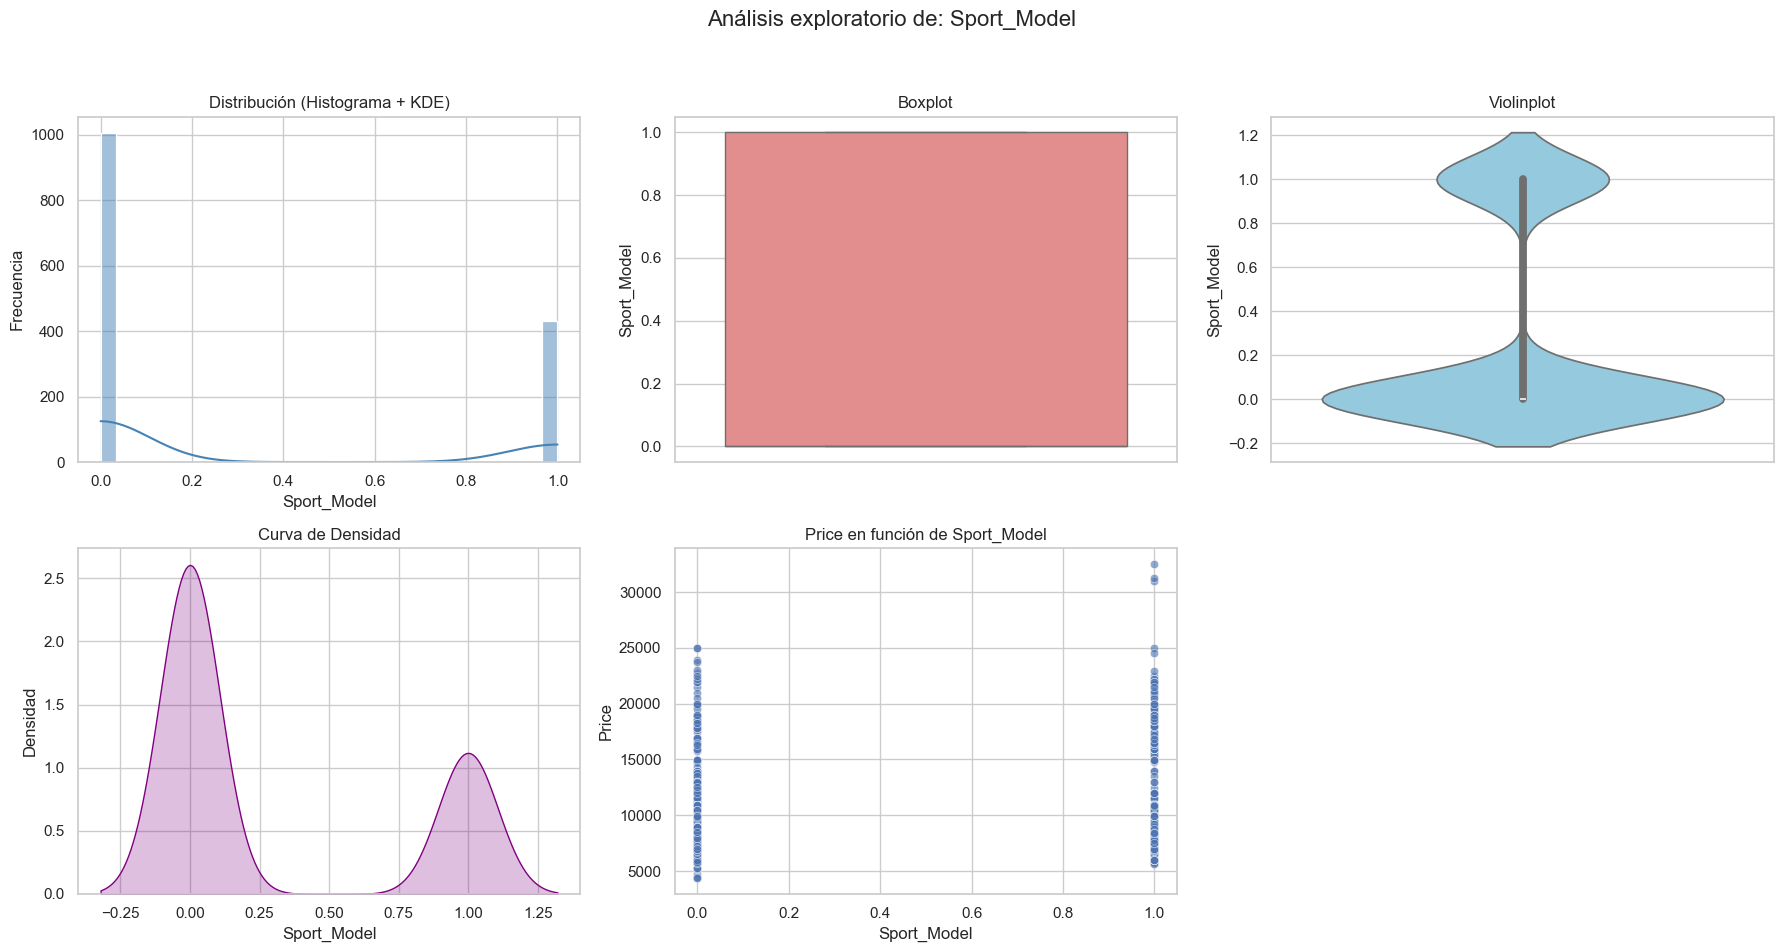

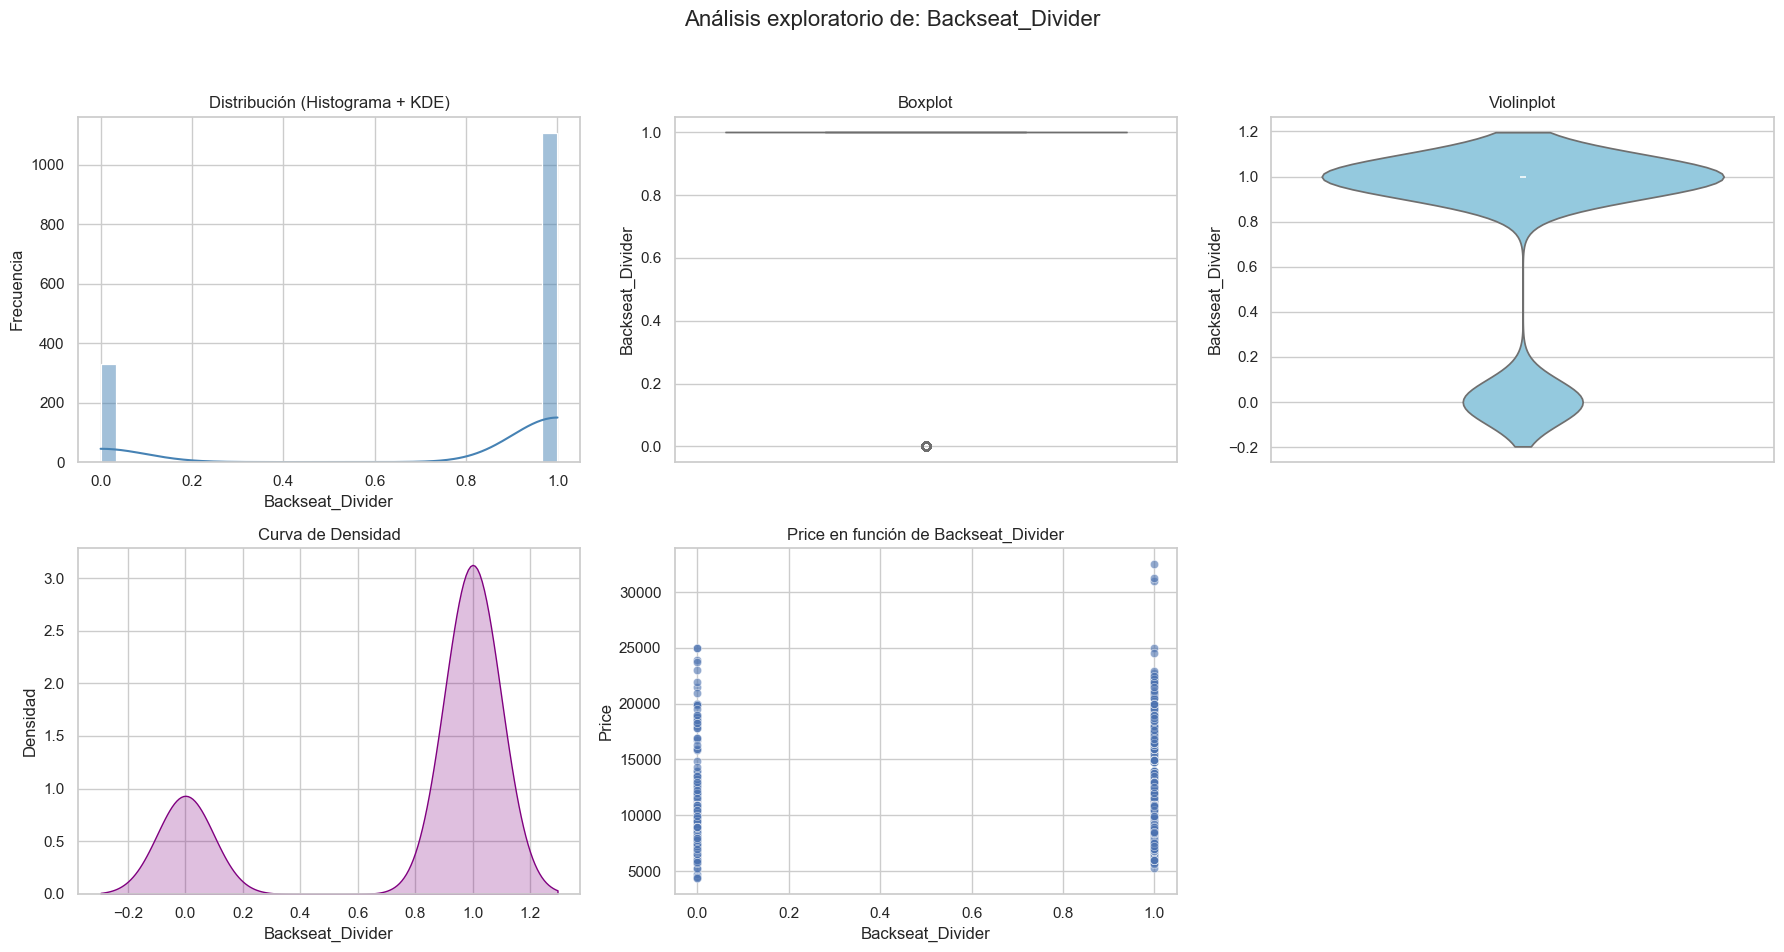

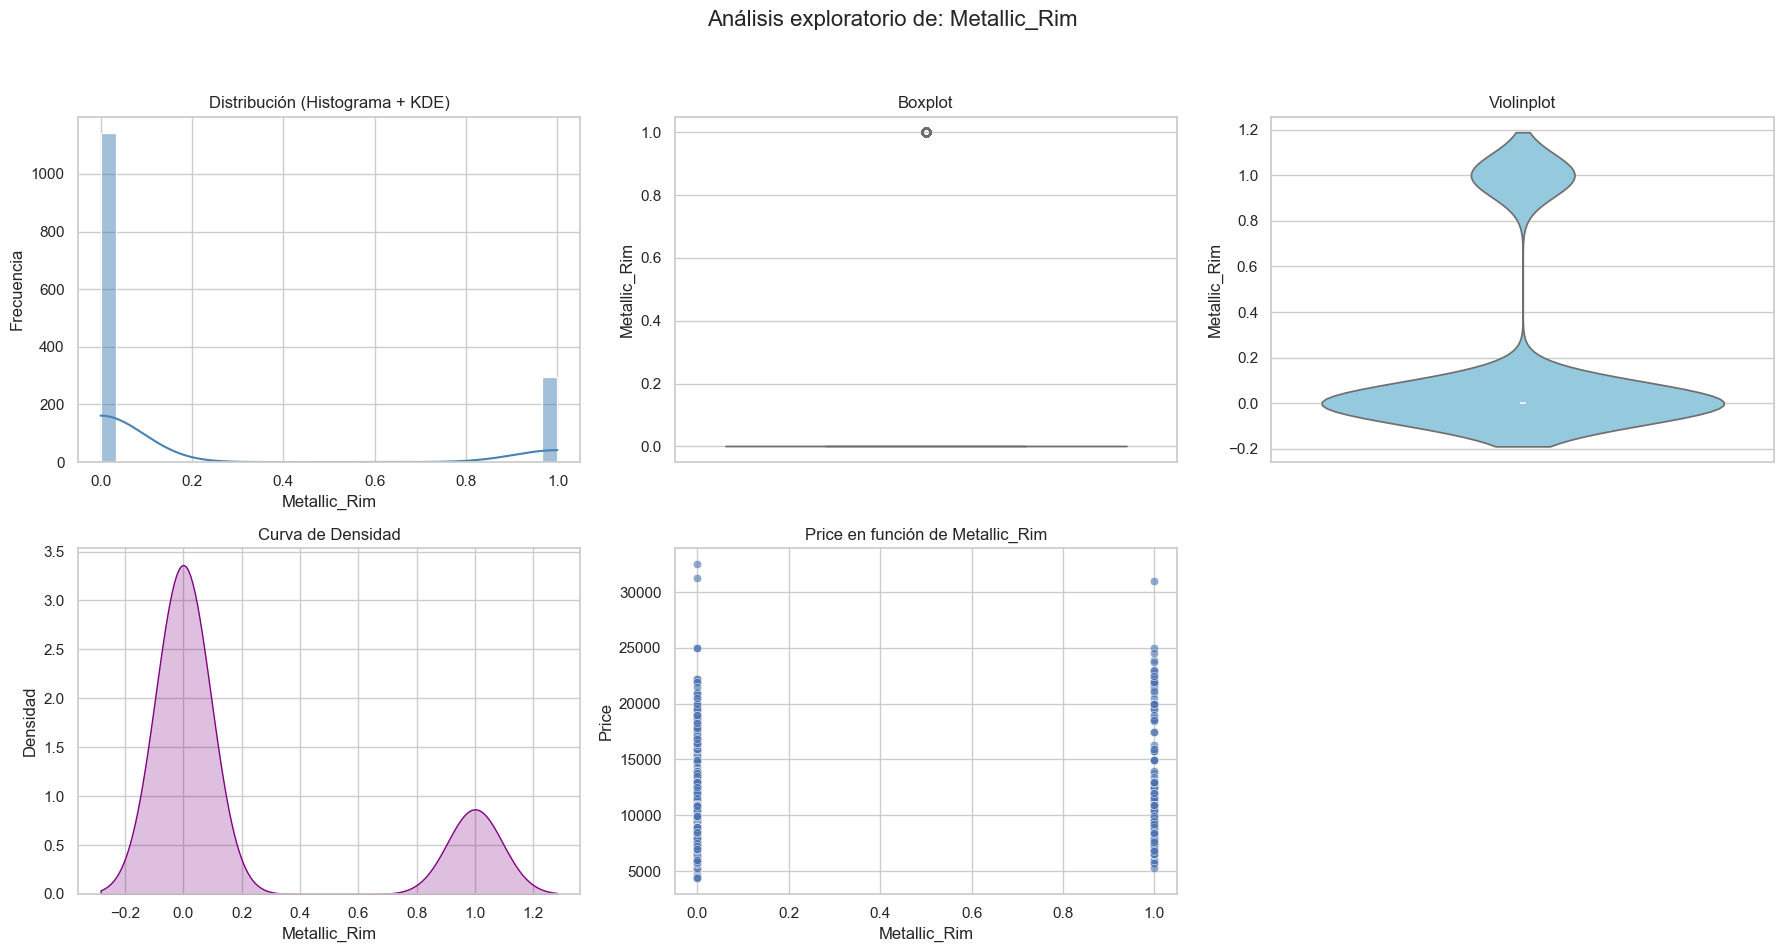

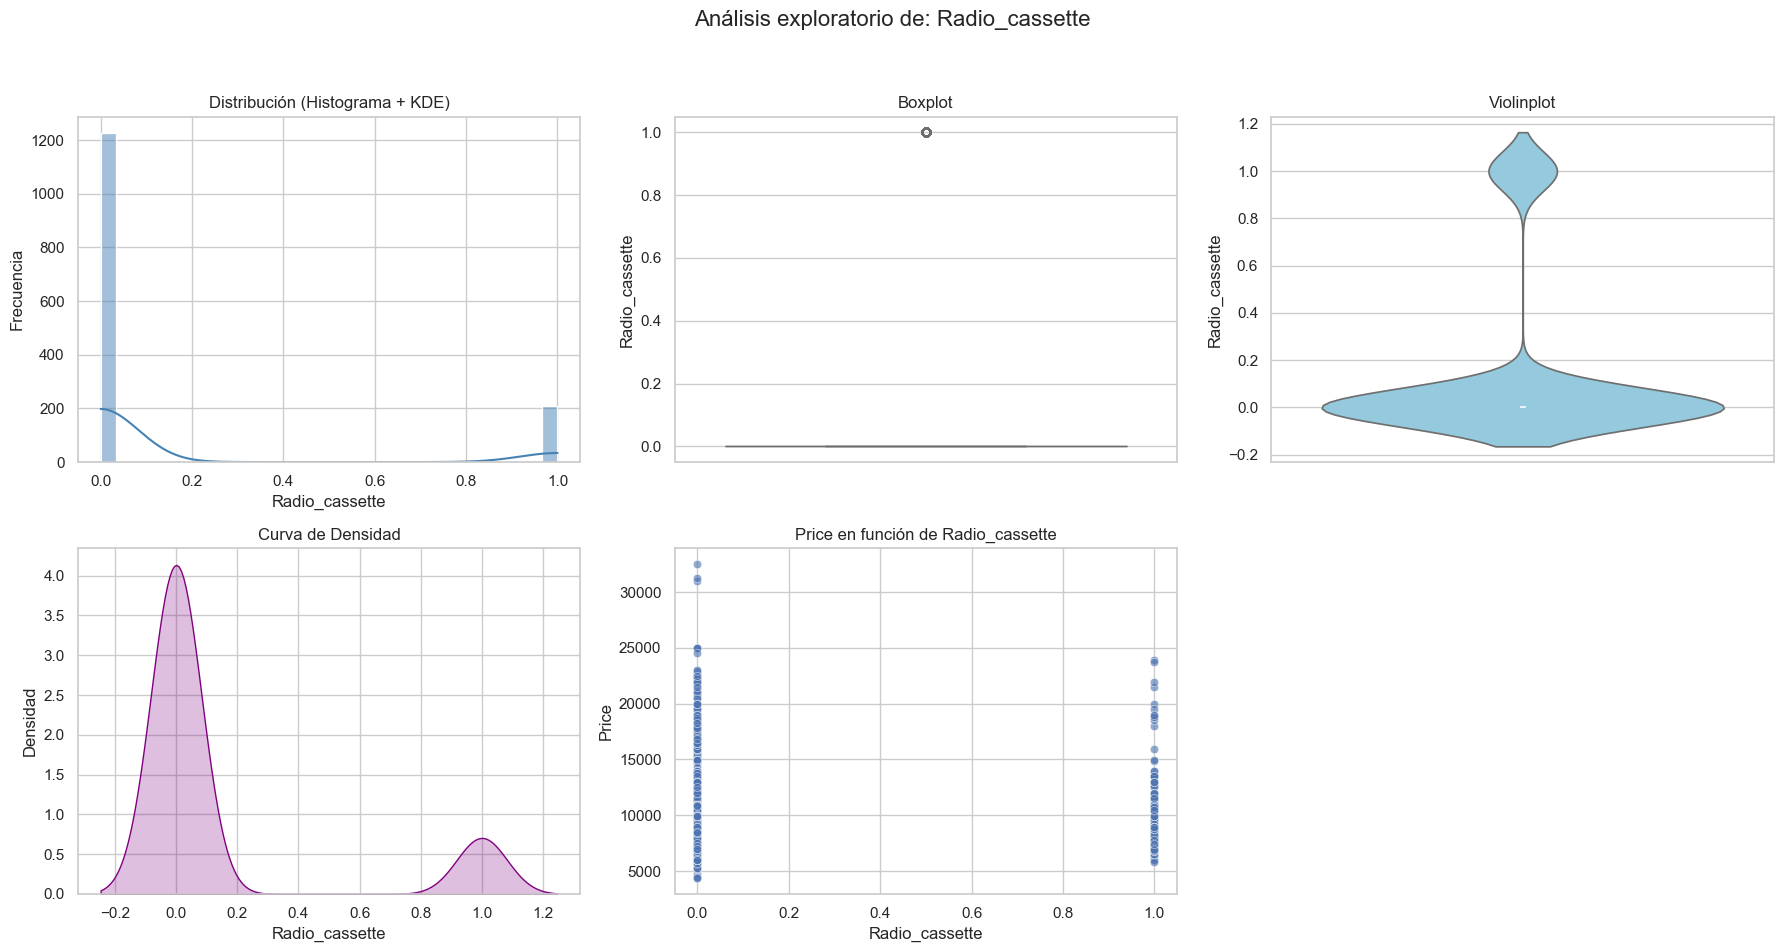

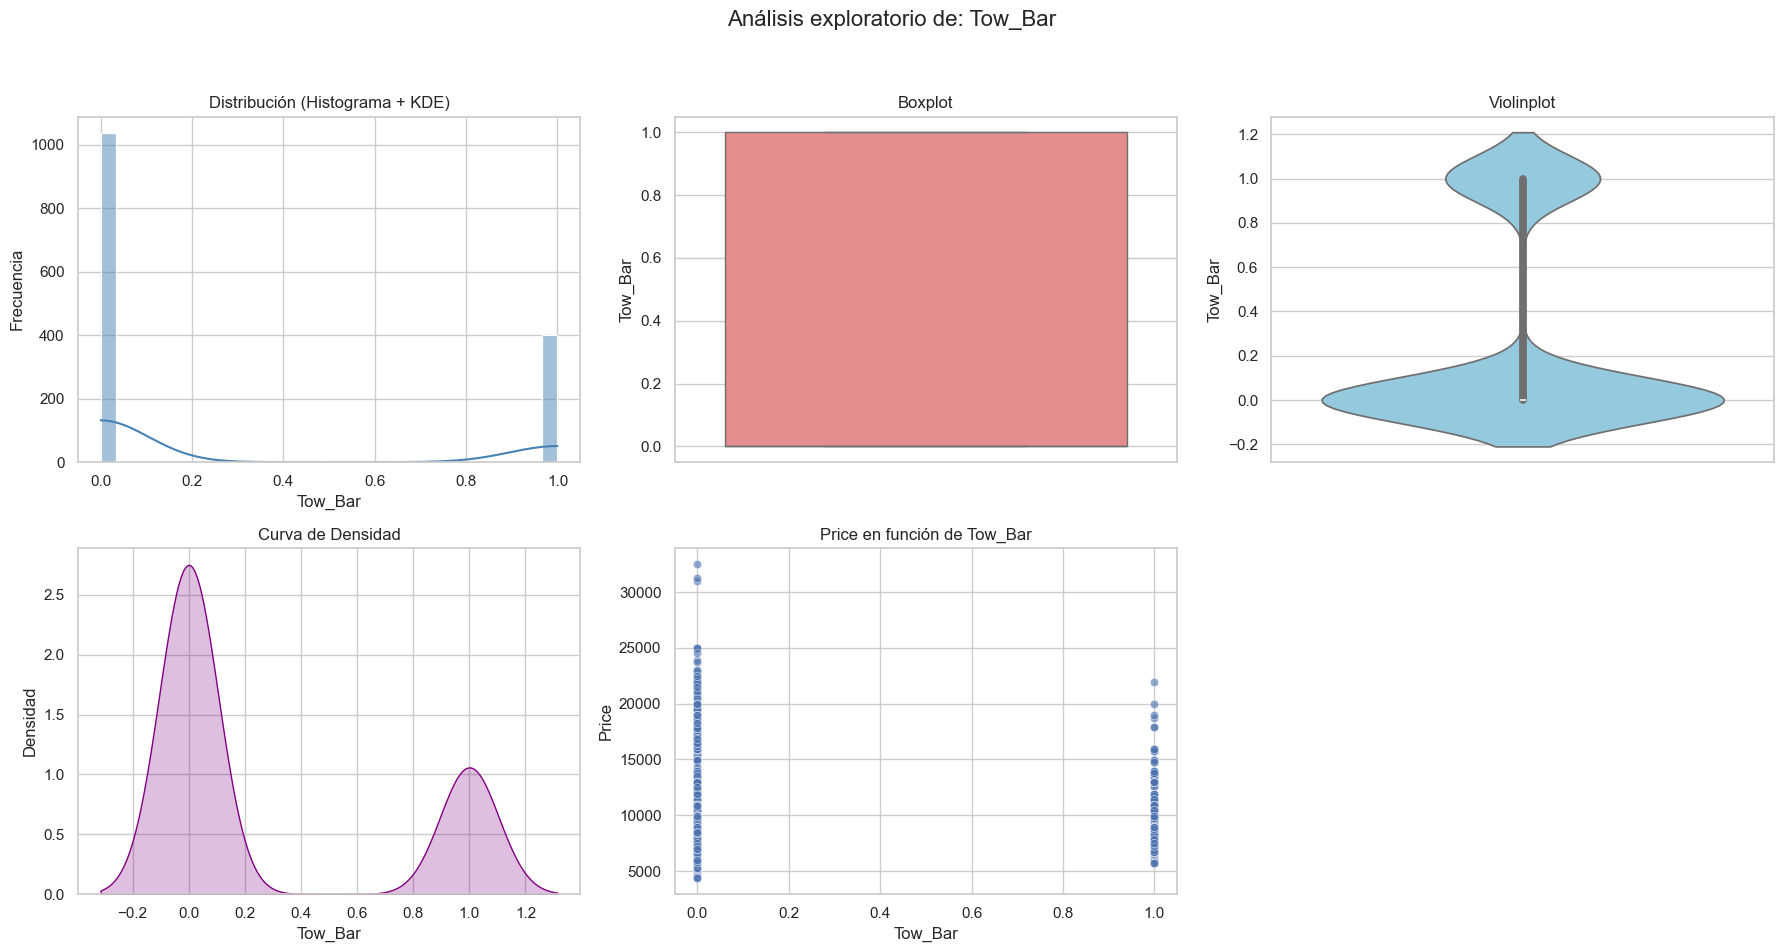

In [57]:
#Estilo general,
sns.set_theme(style="whitegrid")

#Definir la variable objetivo,
target = "Price"

#Columnas numéricas excluyendo la variable objetivo,
numeric_cols = df.select_dtypes(include=["number"]).columns
feature_cols = [col for col in numeric_cols if col != target]

#Graficar por cada feature,
for col in feature_cols:
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Análisis exploratorio de: {col}", fontsize=16)

    # (a) Histograma + KDE
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axs[0, 0], color="steelblue")
    axs[0, 0].set(title="Distribución (Histograma + KDE)", xlabel=col, ylabel="Frecuencia")

    # (b) Boxplot
    sns.boxplot(data=df, y=col, ax=axs[0, 1], color="lightcoral")
    axs[0, 1].set(title="Boxplot", xlabel="", ylabel=col)

    # (c) Violinplot (sin palette, usando color directamente)
    sns.violinplot(data=df, y=col, ax=axs[0, 2], color="skyblue")
    axs[0, 2].set(title="Violinplot", xlabel="", ylabel=col)

    # (d) Densidad (KDE sola)
    sns.kdeplot(data=df[col].dropna(), ax=axs[1, 0], fill=True, color="purple")
    axs[1, 0].set(title="Curva de Densidad", xlabel=col, ylabel="Densidad")

    # (e) Scatterplot vs Price
    sns.scatterplot(data=df, x=col, y=target, ax=axs[1, 1], alpha=0.6)
    axs[1, 1].set(title=f"{target} en función de {col}", xlabel=col, ylabel=target)

    # Espacio vacío para balance visual
    axs[1, 2].axis("off")

    # Ajuste final
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### 4.2 Análisis de Variables Categóricas

/var/folders/1m/bk2lcr5d2p59b73zyk_lvr000000gn/T/ipykernel_54769/104646834.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fuel_Type", palette="pastel")


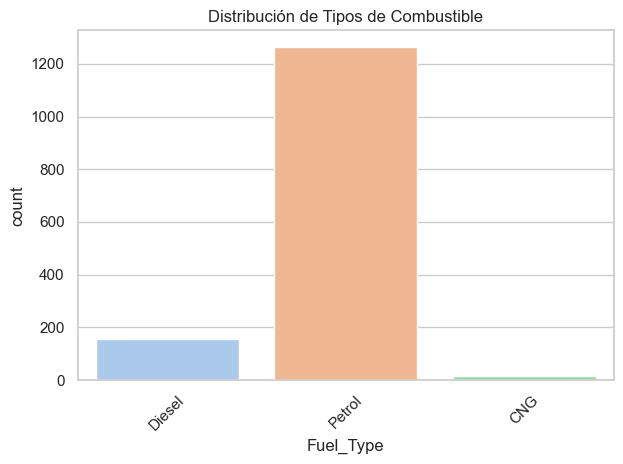

In [58]:
sns.countplot(data=df, x="Fuel_Type", palette="pastel")
plt.title("Distribución de Tipos de Combustible")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.3 Detección de Outliers

In [59]:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = pd.concat([outliers, pd.DataFrame({'Feature':[column], 'Number of Outliers':[df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]]})], ignore_index=True)
    return outliers

# Detectar outliers y ordenar por cantidad (mayor a menor)
outlier_summary = detect_outliers(df)
outlier_summary = outlier_summary.sort_values(by='Number of Outliers', ascending=False).reset_index(drop=True)
outlier_summary

Feature Number of Outliers
0   Backseat_Divider                330
1          CD_Player                314
2       Metallic_Rim                294
3                ABS                268
4      Quarterly_Tax                224
5              Radio                210
6     Radio_cassette                209
7   Guarantee_Period                162
8    BOVAG_Guarantee                150
9                 cc                123
10             Price                110
11   Automatic_airco                 81
12         Automatic                 80
13            Weight                 66
14                KM                 49
15             Gears                 46
16          Airbag_1                 42
17    Power_Steering                 32
18                HP                 11
19         Age_08_04                  7
20         Mistlamps                  0
21       Sport_Model                  0
22   Powered_Windows                  0
23      Central_Lock                  0
24                Id                  0
25     Boardcomputer                  0
26             Airco                  0
27          Airbag_2                  0
28     Mfr_Guarantee                  0
29         Cylinders                  0
30             Doors                  0
31         Met_Color                  0
32          Mfg_Year                  0
33         Mfg_Month                  0
34           Tow_Bar                  0

### 4.4 Análisis de Correlaciones

Identificamos las variables más correlacionadas con el precio

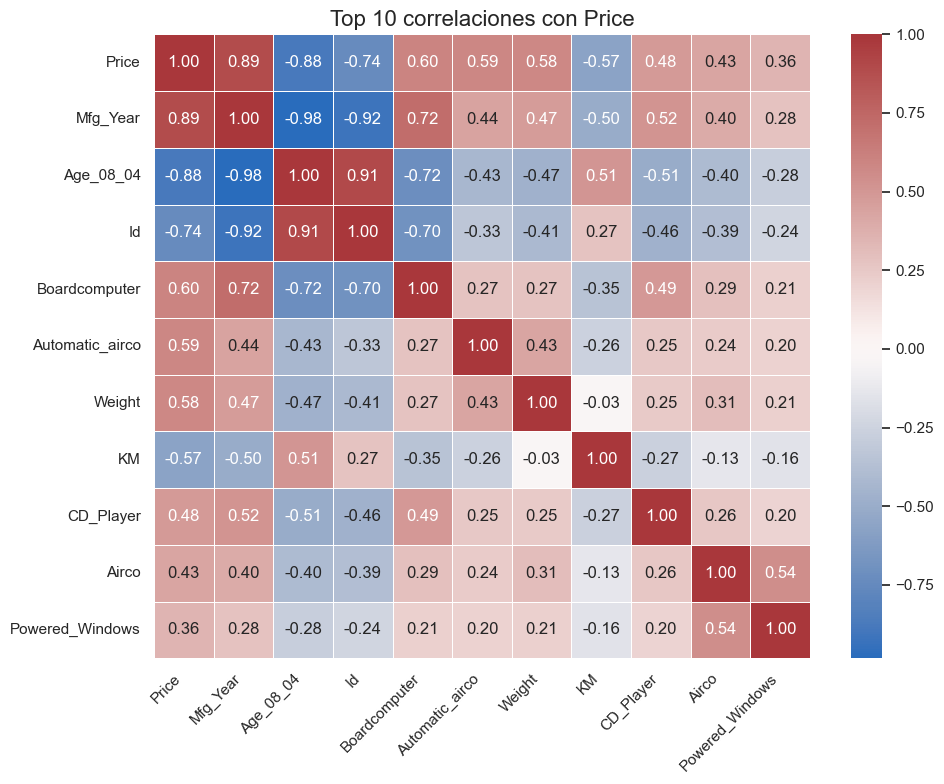

In [60]:
# Crear matriz de correlación para todo el dataset (variables numéricas)
corr = df.select_dtypes(include=['number']).corr()

# 1. Ordenamos por |correlación| absoluta con Price
top_vars = (corr['Price']
            .abs()
            .sort_values(ascending=False)
            .head(11)   # Price + 10 más altas
            .index)

# 2. Filtramos la sub-matriz
sub_corr = corr.loc[top_vars, top_vars]

# 3. Graficamos sólo ese cuadrante
plt.figure(figsize=(10, 8))
sns.heatmap(
    sub_corr,
    cmap="vlag",
    annot=True,
    fmt=".2f",
    linewidths=.5,
    center=0
)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 correlaciones con Price", fontsize=16)
plt.tight_layout()
plt.show()

# Lasso

Alpha óptimo: 79604.020831
Lasso RMSE: 3910.75
Lasso MAE: 2142.13
Lasso R²: -0.2482

Características seleccionadas (3/33):
- KM
- cc
- Weight


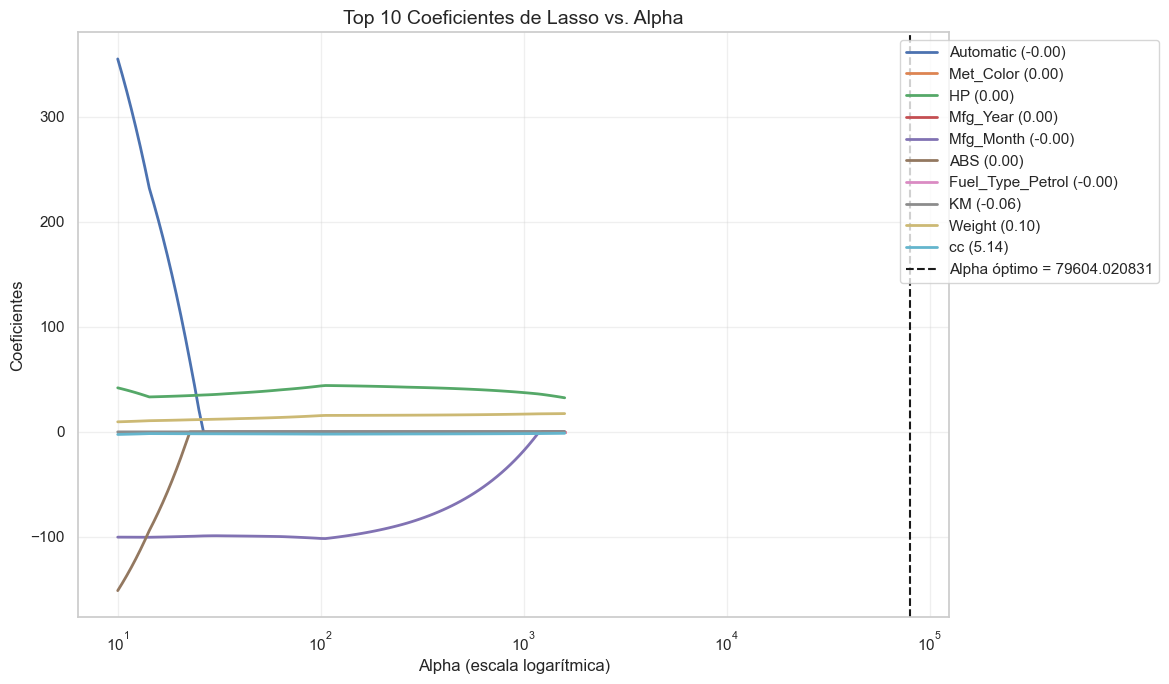

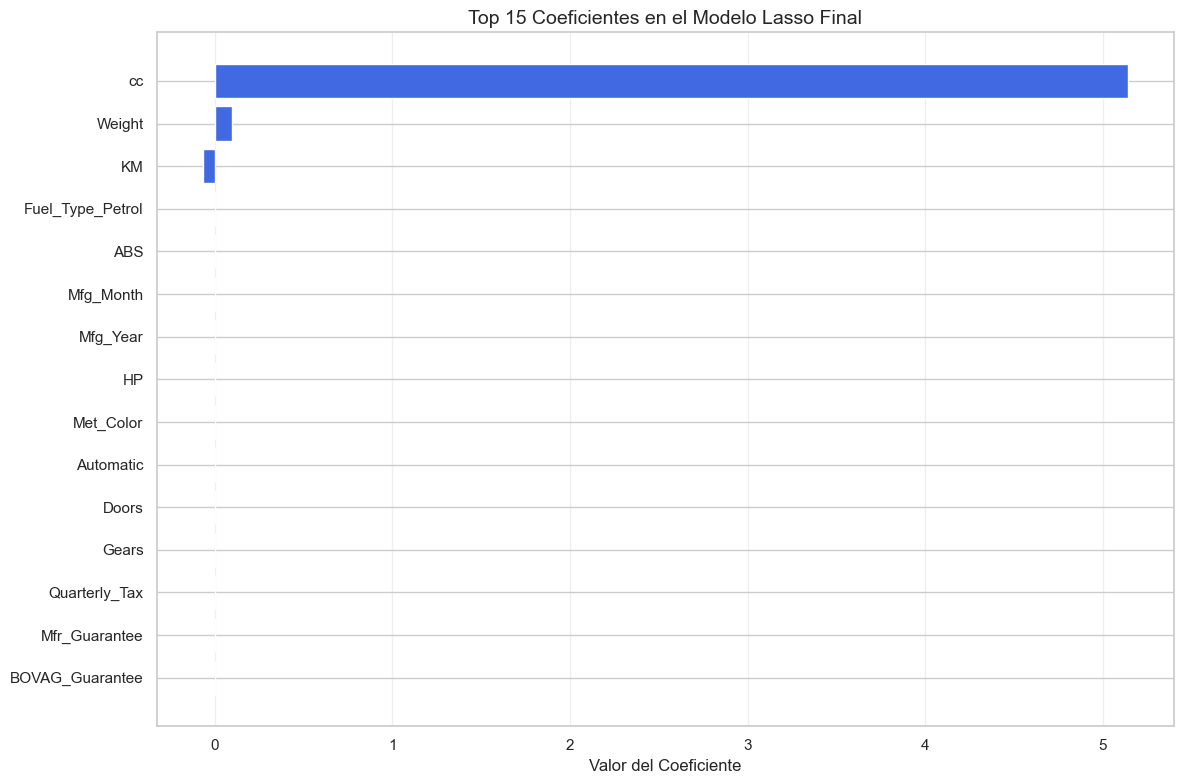

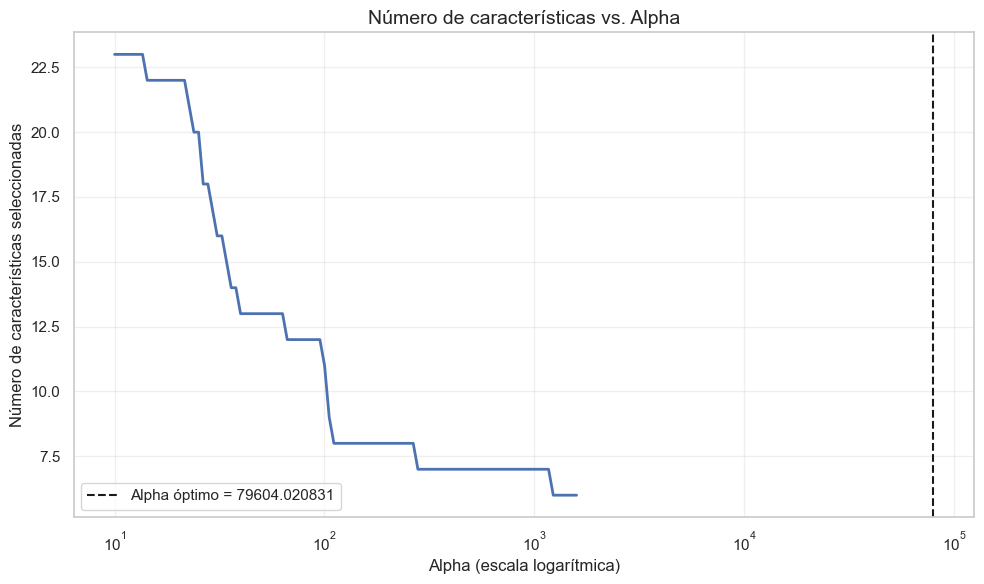

In [67]:
# Lasso Regression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Quitamos la constante para Lasso (no la necesita)
X_train_lasso = X_train.drop("const", axis=1)
X_test_lasso = X_test.drop("const", axis=1)

# Entrenamos modelo LassoCV para encontrar el mejor alpha
lasso = LassoCV(cv=5, random_state=1)
lasso.fit(X_train_lasso, y_train)

# Predicciones y métricas
y_pred_lasso = lasso.predict(X_test_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Alpha óptimo: {lasso.alpha_:.6f}")
print(f"Lasso RMSE: {rmse_lasso:.2f}")
print(f"Lasso MAE: {mae_lasso:.2f}")
print(f"Lasso R²: {r2_lasso:.4f}")

# Características seleccionadas (coeficientes != 0)
selected_features = X_train_lasso.columns[lasso.coef_ != 0]
print(f"\nCaracterísticas seleccionadas ({len(selected_features)}/{X_train_lasso.shape[1]}):")
for feature in selected_features:
    print(f"- {feature}")

# Crear un rango personalizado de alphas centrado en el óptimo
# Rango ajustado para mejor visualización
min_alpha = max(lasso.alpha_ / 50, 1e-6)
max_alpha = min(lasso.alpha_ * 20, 10)
custom_alphas = np.logspace(np.log10(min_alpha), np.log10(max_alpha), 100)

# Calcular coeficientes para cada alpha
coefs = []
for alpha in custom_alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_lasso, y_train)
    coefs.append(lasso_model.coef_)
coefs = np.array(coefs)

# Obtener las 10 características más importantes según sus coeficientes absolutos
top_feature_indices = np.argsort(np.abs(lasso.coef_))[-10:]
top_features = X_train_lasso.columns[top_feature_indices]

# Gráfico 1: Evolución de los 10 coeficientes más importantes
plt.figure(figsize=(12, 7))
for i in top_feature_indices:
    plt.plot(custom_alphas, coefs[:, i], '-', linewidth=2, 
             label=f"{X_train_lasso.columns[i]} ({lasso.coef_[i]:.2f})")

plt.axvline(lasso.alpha_, color='k', linestyle='--', 
            label=f'Alpha óptimo = {lasso.alpha_:.6f}')
plt.xscale('log')
plt.xlabel('Alpha (escala logarítmica)', fontsize=12)
plt.ylabel('Coeficientes', fontsize=12)
plt.title('Top 10 Coeficientes de Lasso vs. Alpha', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Coeficientes finales en el modelo óptimo (gráfico de barras)
plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(np.abs(lasso.coef_))
plt.barh(range(len(sorted_idx[-15:])), lasso.coef_[sorted_idx[-15:]], color='royalblue')
plt.yticks(range(len(sorted_idx[-15:])), X_train_lasso.columns[sorted_idx[-15:]])
plt.title('Top 15 Coeficientes en el Modelo Lasso Final', fontsize=14)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 3: Número de características seleccionadas vs Alpha
n_features = np.zeros(len(custom_alphas))
for i, a in enumerate(custom_alphas):
    n_features[i] = sum(abs(coefs[i]) > 1e-5)  # Umbral para considerar un coeficiente como no-cero

plt.figure(figsize=(10, 6))
plt.plot(custom_alphas, n_features, 'b-', linewidth=2)
plt.axvline(lasso.alpha_, color='k', linestyle='--', 
            label=f'Alpha óptimo = {lasso.alpha_:.6f}')
plt.xscale('log')
plt.xlabel('Alpha (escala logarítmica)', fontsize=12)
plt.ylabel('Número de características seleccionadas', fontsize=12)
plt.title('Número de características vs. Alpha', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Preprocesamiento de Datos

En esta sección preparamos los datos para el modelado:
- Separación de features y target
- Eliminación de columnas no relevantes
- Combinación de variables
- One-hot encoding
- División train-test

In [61]:
# 1. Separar X (todas las columnas salvo Price) e y (Price)
X = df.drop("Price", axis=1)
y = df["Price"]

# 2. Eliminar columnas no útiles para el modelo
X = X.drop(["Model", "Cylinders", "Id"], axis=1)
# Justificación:
# - Price es el target
# - Cylinders no son relevantes para el modelo al ser constante
# - Model lo sacamos de momento, aunque luego lo podemos usar para el modelo final

# 3. Combinar variables de airbags
X["Airbag_Count"] = df["Airbag_1"].fillna(0) + df["Airbag_2"].fillna(0)
X.drop(["Airbag_1", "Airbag_2"], axis=1, inplace=True)

# 4. One-hot encoding para variables categóricas
X = pd.get_dummies(X, drop_first=True)           # One-hot encoding

# 5. Conversión a tipos numéricos
X = X.apply(pd.to_numeric, errors='coerce')      # Forzar datos a numérico
y = pd.to_numeric(y, errors='coerce')            # Lo mismo para el target

# 6. Eliminar filas con NaNs
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop("Price", axis=1)
y = combined["Price"]

# 7. Convertir a float y agregar constante para OLS
X = X.astype(float)
y = y.astype(float)
X_with_const = sm.add_constant(X)

# 8. División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_with_const, y, test_size=0.4, random_state=1
)

print(f"Dimensiones finales - X_train: {X_train.shape}, X_test: {X_test.shape}")

Dimensiones finales - X_train: (861, 34), X_test: (575, 34)


## 6. Modelado y Evaluación

Entrenamos un modelo OLS y evaluamos su rendimiento

In [62]:
with mlflow.start_run(run_name="ols_model_run"):
    # 9. Ajuste OLS
    model   = sm.OLS(y_train, X_train)
    results = model.fit()

    # 10. Predicción
    y_pred = results.predict(X_test)

    # 11. Métricas
    rmse       = mean_squared_error(y_test, y_pred)
    mae        = mean_absolute_error(y_test, y_pred)
    r2_sklearn = r2_score(y_test, y_pred)
    r2_sm      = results.rsquared
    adj_r2     = results.rsquared_adj
    aic        = results.aic
    bic        = results.bic

    # 12. Log de métricas en MLflow
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2_sklearn", r2_sklearn)
    mlflow.log_metric("r2_statsmodels", r2_sm)
    mlflow.log_metric("adj_r2", adj_r2)
    mlflow.log_metric("aic", aic)
    mlflow.log_metric("bic", bic)
    mlflow.log_metric("n_features", X_train.shape[1])
    
    # 13. Carpeta de artefactos
    os.makedirs("mlartifacts", exist_ok=True)

    # 14. Summary de OLS
    summary_path = os.path.join("mlartifacts", "ols_summary.txt")
    with open(summary_path, "w") as f:
        f.write(results.summary().as_text())
    mlflow.log_artifact(summary_path)

    # 15. Serializar modelo
    model_pkl = os.path.join("mlartifacts", "ols_model.pkl")
    joblib.dump(results, model_pkl)
    mlflow.log_artifact(model_pkl)

    # 16. Guardar nombres de features
    features_path = os.path.join("mlartifacts", "features.txt")
    with open(features_path, "w") as f:
        f.write("\n".join(X_with_const.columns))
    mlflow.log_artifact(features_path)

    # =======================
    # VIF ANALYSIS
    # =======================

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    vif_path = os.path.join("mlartifacts", "vif_report.csv")
    vif_data.to_csv(vif_path, index=False)
    mlflow.log_artifact(vif_path)

    # =======================
    # GRÁFICOS
    # =======================

    # Plot: Real vs. Predicho
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs. Predicted Price")
    plt.grid(True)
    real_vs_pred_path = os.path.join("mlartifacts", "actual_vs_predicted.png")
    plt.savefig(real_vs_pred_path)
    mlflow.log_artifact(real_vs_pred_path)
    plt.close()

    # Plot: Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Price")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.grid(True)
    residuals_path = os.path.join("mlartifacts", "residuals_plot.png")
    plt.savefig(residuals_path)
    mlflow.log_artifact(residuals_path)
    plt.close()

    # =======================
    # MATRIZ DE CORRELACIÓN
    # =======================

    plt.figure(figsize=(16, 12))
    corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar_kws={"shrink": 0.75},
        linewidths=0.5,
        annot_kws={"size": 10}
    )
    plt.title("Correlation Matrix", fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    corr_matrix_path = os.path.join("mlartifacts", "correlation_matrix.png")
    plt.tight_layout()
    plt.savefig(corr_matrix_path)
    mlflow.log_artifact(corr_matrix_path)
    plt.close()

    print("Modelo OLS registrado con MLflow.")

/opt/anaconda3/envs/parcial_toyota/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/envs/parcial_toyota/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Modelo OLS registrado con MLflow.
🏃 View run ols_model_run at: http://127.0.0.1:5000/#/experiments/576424483513881687/runs/e51c164ee22245a4a1c6a29075957cbe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/576424483513881687
